<a href="https://colab.research.google.com/github/nataliatasso/WMC_notebooks/blob/main/C%C3%B3pia_de_Desafio_Final_Combustivel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Os dados**

A Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) divulga relatórios semanais dos preços do gás, diesel e outros combustíveis utilizados no transporte em todo o país. Esses conjuntos de dados trazem o valor médio por litro, número de postos de gasolina analisados e outras informações agrupadas por regiões e estados em todo o país.

---

**Fonte**

Conforme dito anteriormente, esses conjuntos de dados são fornecidos pela ANP e são atualizados regularmente com novas datas e informações - que podem ser acessadas aqui.

A base contém as seguintes informações:

*	DATA INICIAL
*	DATA FINAL
*	REGIÃO
*	ESTADO
*	PRODUTO
*	NÚMERO DE POSTOS PESQUISADOS
*	UNIDADE DE MEDIDA
*	PREÇO MÉDIO REVENDA
*	DESVIO PADRÃO REVENDA
*	PREÇO MÍNIMO REVENDA
*	PREÇO MÁXIMO REVENDA
*	MARGEM MÉDIA REVENDA
*	COEF DE VARIAÇÃO REVENDA
*	PREÇO MÉDIO DISTRIBUIÇÃO
*	DESVIO PADRÃO DISTRIBUIÇÃO
*	PREÇO MÍNIMO DISTRIBUIÇÃO
*	PREÇO MÁXIMO DISTRIBUIÇÃO
*	COEF DE VARIAÇÃO DISTRIBUIÇÃO


# Análise dos dados

## 1. Faça a exploração de todos os dados com seus respectivos valores. Analise a quantidade de postos de combustíveis e suas respectivas regiões, isso pode influenciar os preços? Faça um comparativo entre as mesmas e represente-as em gráficos.

In [ ]:
# Importando bibliotecas para manipulação dos dados
import pandas as pd
import numpy as np
!pip install unidecode
from unidecode import unidecode

# Importando bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Importando bibliotecas para testes estatísticos
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ks_1samp, norm, kruskal

#Importando bibliotecas para análise das Séries Temporais
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importando bibliotecas para as métricas de performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.7 MB/s eta 0:00:00


In [ ]:
# Upload do dataset e leitura inicial
df_combustivel_inicial = pd.read_csv('/content/preco-combustivel-2004-2021.csv')
df_combustivel_inicial

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [ ]:
# Verificação do tipo de variáveis
df_combustivel_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

---

**Limpeza dos dados**

---

<font color="lightgreen"> **Análise** </font><br>

O primeiro passo foi investigar o dataframe para identificar as mudanças necessárias para organizar e normalizar os dados, tornando-os adequados para análise.

Inicialmente, verificamos se os tipos de variáveis no dataframe estavam corretos. Observamos os seguintes pontos:

**(a)** As colunas 'DATA INICIAL' e 'DATA FINAL' estavam no formato *object*, mas deveriam ser convertidas para *datetime*.

**(b)** As colunas 'MARGEM MÉDIA REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO' e 'COEF DE VARIAÇÃO DISTRIBUIÇÃO' também estavam como *object* e precisavam ser transformadas para o formato numérico *float*.

**(c)** Identificamos valores inválidos representados pelos símbolos '-' e '-99999.0', que deveriam ser tratados como valores ausentes (NaN). Esses valores foram marcados como ausentes para evitar problemas nas análises subsequentes. Optamos por não excluir os dados nulos de imediato, pois isso poderia levar à perda de informações importantes, como registros de um ano inteiro. Como os dados de outras colunas nessas linhas ainda podem ser úteis, decidimos excluir os nulos apenas quando necessário, durante análises específicas.

**(d)** Observamos inconsistências nas colunas de texto. Por exemplo, categorias como 'oleo diesel' e 'óleo diesel' eram registradas de formas diferentes devido ao uso ou não de acentos, o que as fazia ser tratadas como categorias distintas, embora representassem o mesmo produto. Para corrigir isso, normalizamos as colunas de texto, convertendo todas as entradas para letras minúsculas, removendo acentos e eliminando espaços extras no início e no final das strings. Isso garantiu a consistência e a precisão das categorias.

In [ ]:
# Fazer uma cópia do df original
df_combustivel = df_combustivel_inicial.copy()

# Substituir valores ausentes representados por "-99999.0" e "-" por NaN
df_combustivel.replace(["-99999.0", "-", -99999.0], np.nan, inplace=True)

# Conversão das colunas 'DATA INICIAL' e 'DATA FINAL' para o formato datetime
df_combustivel['DATA INICIAL'] = pd.to_datetime(df_combustivel['DATA INICIAL'])
df_combustivel['DATA FINAL'] = pd.to_datetime(df_combustivel['DATA FINAL'])

# Converter colunas que deveriam ser float
float_columns = [
    'MARGEM MÉDIA REVENDA',
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO'
]

for col in float_columns:
    df_combustivel[col] = pd.to_numeric(df_combustivel[col])

# Normalizar as colunas categóricas
categorical_columns = ['PRODUTO', 'REGIÃO', 'ESTADO', 'UNIDADE DE MEDIDA']

for col in categorical_columns:
    df_combustivel[col] = (
        df_combustivel[col]
        .astype(str)                # Garantir que seja string
        .str.lower()                # Converter para minúsculas
        .apply(unidecode)           # Remover acentos
        .str.strip()                # Remover espaços no início e no fim
    )

# Verificar os resultados
df_combustivel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

In [ ]:
# Exibir os valores únicos de todas as colunas categóricas para verificar normalização
for col in categorical_columns:
    print(f"Valores únicos na coluna '{col}':")
    print(df_combustivel[col].unique())
    print("-" * 50)

Valores únicos na coluna 'PRODUTO':
['etanol hidratado' 'gasolina comum' 'glp' 'gnv' 'oleo diesel'
 'oleo diesel s10' 'gasolina aditivada']
--------------------------------------------------
Valores únicos na coluna 'REGIÃO':
['centro oeste' 'nordeste' 'norte' 'sudeste' 'sul']
--------------------------------------------------
Valores únicos na coluna 'ESTADO':
['distrito federal' 'goias' 'mato grosso' 'mato grosso do sul' 'alagoas'
 'bahia' 'ceara' 'maranhao' 'paraiba' 'pernambuco' 'piaui'
 'rio grande do norte' 'sergipe' 'acre' 'amapa' 'amazonas' 'para'
 'rondonia' 'roraima' 'tocantins' 'espirito santo' 'minas gerais'
 'rio de janeiro' 'sao paulo' 'parana' 'rio grande do sul'
 'santa catarina']
--------------------------------------------------
Valores únicos na coluna 'UNIDADE DE MEDIDA':
['r$/l' 'r$/13kg' 'r$/m3']
--------------------------------------------------


In [ ]:
# Exibir para confirmar as alterações
df_combustivel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,centro oeste,distrito federal,etanol hidratado,127,r$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,2004-05-15,centro oeste,goias,etanol hidratado,387,r$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,2004-05-15,centro oeste,mato grosso,etanol hidratado,192,r$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,2004-05-15,centro oeste,mato grosso do sul,etanol hidratado,162,r$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,nordeste,alagoas,etanol hidratado,103,r$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


---

**Exploração dos dados**

---

In [ ]:
# Principais métricas
df_combustivel.describe(include = 'number')

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
count,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000,111875.000000,120823.000000,111915.000000,111915.000000,111915.000000,111915.000000,111915.000000
mean,221.066461,11.473440,0.684132,9.977821,13.233902,2.324677,0.045298,8.916643,0.580658,7.744055,10.199183,0.046302
std,387.940239,19.161823,1.403317,16.433783,22.451445,4.591806,0.024763,14.357997,1.304524,12.378073,16.757093,0.041574
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000
25%,39.000000,2.157000,0.075000,1.989000,2.420000,0.289000,0.029000,1.843000,0.048000,1.711600,1.987150,0.021000
50%,99.000000,2.899000,0.121000,2.690000,3.200000,0.391000,0.041000,2.434000,0.080000,2.292200,2.607000,0.031000
75%,226.000000,4.026000,0.204000,3.790000,4.589000,0.577000,0.058000,3.438000,0.156000,3.278700,3.648050,0.060000
max,4167.000000,107.500000,10.748000,100.000000,120.000000,36.847000,0.395000,83.137000,18.385000,83.000000,94.500000,0.780000


---

**Análise da influência dos postos de combustíveis e suas respectivas regiões nos preços**

---

In [ ]:
# Agrupando por região e calculando a soma dos postos e a média dos preços
df_regioes = df_combustivel.groupby('REGIÃO').agg({
    'NÚMERO DE POSTOS PESQUISADOS': 'sum',
    'PREÇO MÉDIO REVENDA': 'mean',
    'PREÇO MÉDIO DISTRIBUIÇÃO': 'mean'
    }).reset_index()

df_regioes

,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO
0,centro oeste,2284267,12.440722,10.158783
1,nordeste,4882880,10.663357,7.845814
2,norte,1754917,13.411680,10.880655
3,sudeste,12981725,10.217240,7.776450
4,sul,4806124,10.562091,8.277980


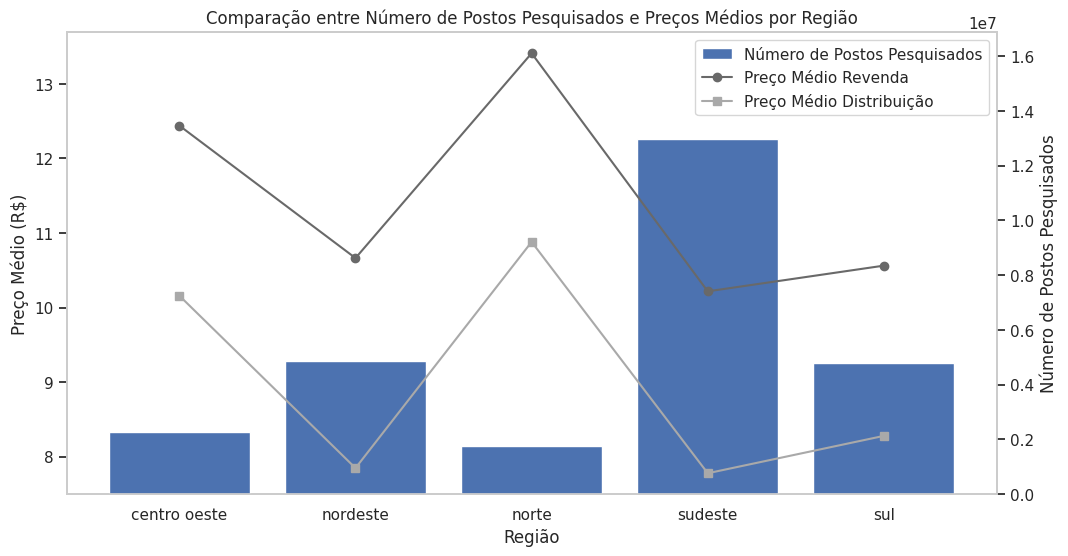

In [ ]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Visualização gráfica do número de postos e preços médios
fig, ax = plt.subplots(figsize=(12, 6))

# Eixo secundário - barras
ax2 = ax.twinx()
ax2.set_ylim([0, df_regioes['NÚMERO DE POSTOS PESQUISADOS'].max() * 1.3])

# Eixo clone - linhas
ax1 = fig.add_axes(ax.get_position(), sharex=ax, sharey=ax)
ax1.set_axis_off()
ax1.set_xticks(range(len(df_regioes['REGIÃO'])))
ax1.set_xticklabels(df_regioes['REGIÃO'])

# Gráfico de barras
bar = ax2.bar(
    range(len(df_regioes['REGIÃO'])),
    df_regioes['NÚMERO DE POSTOS PESQUISADOS'],
    color='#4c72b0',  # Cor ajustada para o tom exato
    label='Número de Postos Pesquisados'
)

# Gráficos de linha para os preços
line1, = ax1.plot(
    range(len(df_regioes['REGIÃO'])),
    df_regioes['PREÇO MÉDIO REVENDA'],
    color='dimgray',
    marker='o',
    label='Preço Médio Revenda'
)
line2, = ax1.plot(
    range(len(df_regioes['REGIÃO'])),
    df_regioes['PREÇO MÉDIO DISTRIBUIÇÃO'],
    color='darkgray',
    marker='s',
    label='Preço Médio Distribuição'
)

# Títulos e legendas
ax.set_title('Comparação entre Número de Postos Pesquisados e Preços Médios por Região')
ax.set_ylabel('Preço Médio (R$)')
ax.set_xlabel('Região')
ax2.set_ylabel('Número de Postos Pesquisados')

# Ajustar grids e legendas
ax.grid(False)
ax2.grid(False)

ax2.legend([bar, line1, line2], ['Número de Postos Pesquisados', 'Preço Médio Revenda', 'Preço Médio Distribuição'], loc='upper right')

# Exibir o gráfico
plt.show()

<font color="lightgreen"> ***Análise*** </font><br>

No gráfico, é possível ver que a região Sudeste possui o maior **número de postos** pesquisados, seguido de Nordeste, Sul, Centro Oeste e por último Norte.

O **preço médio de revenda** foi o maior na região Norte, seguido de Centro Oeste, Sul, Nordeste e por último Sudeste.

O **preço médio de distribuição** foi o maior na região Norte, seguido de Centro Oeste, Sul, Nordeste e por último Sudeste, bem semelhante ao preço médio de revenda.

Dessa forma, a relação entre número de postos por região e preço pode ser considerada **inversamente proporcional**. Ou seja, quanto maior o número de postos pesquisados, menores os preços.


**INVESTIGAÇÃO DAS REGIÕES DE EXPLORAÇÃO E REFINO DO COMBUSTÍVEL**

In [ ]:
# Calcular a margem média de revenda por região
margem_media_por_regiao = df_combustivel.groupby('REGIÃO')['MARGEM MÉDIA REVENDA'].mean().reset_index()

# Exibir os resultados
print(margem_media_por_regiao)

         REGIÃO  MARGEM MÉDIA REVENDA
0  centro oeste              2.552615
1      nordeste              2.173942
2         norte              2.313114
3       sudeste              2.417221
4           sul              2.389759


In [ ]:
# Verificar a normalidade para cada grupo com Kolmogorov-Smirnov
normalidade = {}
for regiao in df_combustivel["REGIÃO"].unique():
    grupo = df_combustivel[df_combustivel["REGIÃO"] == regiao]["MARGEM MÉDIA REVENDA"].dropna().astype(float)
    stat, p_value = ks_1samp(grupo, cdf=norm.cdf)
    normalidade[regiao] = p_value >= 0.05  # True se é normal, False se não é

# Exibir os resultados de normalidade
print("Teste de Normalidade (Kolmogorov-Smirnov):")
for regiao, eh_normal in normalidade.items():
    status = "Normal" if eh_normal else "Não Normal"
    print(f"Região {regiao}: {status}")

# Decidir se aplica ANOVA ou Kruskal-Wallis
if all(normalidade.values()):  # Todos os grupos são normais
    grupos_regioes = [df_combustivel[df_combustivel["REGIÃO"] == regiao]["MARGEM MÉDIA REVENDA"].dropna().astype(float)
                      for regiao in df_combustivel["REGIÃO"].unique()]
    # Teste ANOVA
    anova_result = f_oneway(*grupos_regioes)
    print("\nTeste ANOVA:")
    print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

    # Mensagem final
    if anova_result.pvalue < 0.05:
        print("Conclusão: O preço varia significativamente entre as regiões (ANOVA).")
    else:
        print("Conclusão: O preço não varia significativamente entre as regiões (ANOVA).")
else:
    grupos_regioes = [df_combustivel[df_combustivel["REGIÃO"] == regiao]["MARGEM MÉDIA REVENDA"].dropna().astype(float)
                      for regiao in df_combustivel["REGIÃO"].unique()]
    # Teste Kruskal-Wallis
    kruskal_result = kruskal(*grupos_regioes)
    print("\nTeste Kruskal-Wallis:")
    print(f"H-statistic: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")

    # Mensagem final
    if kruskal_result.pvalue < 0.05:
        print("Conclusão: O preço varia significativamente entre as regiões.")
    else:
        print("Conclusão: O preço não varia significativamente entre as regiões.")

Teste de Normalidade (Kolmogorov-Smirnov):
Região centro oeste: Não Normal
Região nordeste: Não Normal
Região norte: Não Normal
Região sudeste: Não Normal
Região sul: Não Normal

Teste Kruskal-Wallis:
H-statistic: 1029.9192, p-value: 0.0000
Conclusão: O preço varia significativamente entre as regiões.


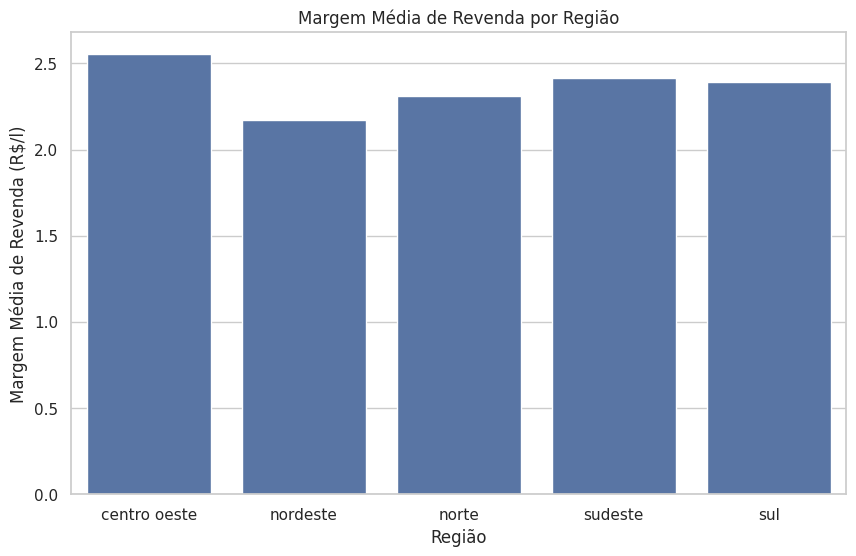

In [ ]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar um gráfico de barras para a margem média de revenda por região
plt.figure(figsize=(10, 6))
sns.barplot(
    x='REGIÃO',
    y='MARGEM MÉDIA REVENDA',
    data=margem_media_por_regiao,
    color='#4c72b0'  # Cor ajustada para o azul padrão do Seaborn
)

plt.title('Margem Média de Revenda por Região')
plt.xlabel('Região')
plt.ylabel('Margem Média de Revenda (R$/l)')
plt.show()


<font color="lightgreen"> ***Análise*** </font><br>

Pudemos verificar que há diferença estatística significativa entre o preço da margem média de revenda e as regiões.

Analisando com mais detalhes, temos que:

**1. Centro-Oeste apresenta a maior margem média de revenda R$ 2.55**

O Centro-Oeste tem a maior margem, possivelmente devido à falta de refinarias locais e sua distância significativa das principais áreas produtoras e refinarias.
Os custos de transporte e logística provavelmente aumentam os preços nessa região, resultando em margens mais altas para compensar esses custos adicionais.

**2. Nordeste com a menor margem média de revenda R$ 2.17**

O Nordeste possui refinarias relevantes, como a Refinaria Abreu e Lima (RNEST) em Pernambuco e a Refinaria Landulpho Alves (RLAM) na Bahia. Além disso, possui regiões produtoras de petróleo, como a Bacia Potiguar (Rio Grande do Norte) e a Bacia do Recôncavo (Bahia).
A proximidade de infraestrutura reduz custos logísticos, o que pode contribuir para margens mais baixas.

**3. Norte com margem intermediária R$ 2.31**

O Norte é uma região de produção de petróleo (exemplo: Bacia do Solimões, no Amazonas), mas possui apenas uma refinaria, a Isaac Sabbá (REMAN), localizada em Manaus.
A logística nessa região ainda é desafiadora devido à geografia e à infraestrutura limitada, o que pode manter a margem em um nível relativamente elevado.

**4. Sudeste com margem de R$ 2.42**

O Sudeste é o maior polo de produção e refino de petróleo do Brasil, com refinarias importantes, como a REPLAN (Paulínia), a REDUC (Duque de Caxias) e a RPBC (Cubatão). Além disso, possui as principais bacias produtoras de petróleo: Bacia de Campos e Bacia de Santos.
Apesar disso, o Sudeste apresenta uma margem média intermediária, possivelmente devido à maior concorrência entre os postos e à densidade de mercado que equilibra os preços.

**5. Sul com margem de R$ 2.39**

O Sul possui refinarias como a REFAP (Canoas, RS) e a REPAR (Araucária, PR). Embora a proximidade de refinarias possa reduzir os custos logísticos, margens intermediárias podem ser influenciadas por fatores como impostos regionais e o menor volume de produção em relação ao Sudeste.

**Fontes**:

https://www.alemdasuperficie.org/setor/conheca-o-parque-de-refino-do-brasil/

https://g1.globo.com/economia/noticia/2014/11/petrobras-anuncia-novas-descobertas-no-reconcavo-e-na-bacia-potiguar.html



## 2. Qual a média e mediana de valores dos combustíveis durante a pandemia (2020-2021) no Brasil? Faça o mesmo com cada região.

In [ ]:
combustivel_df = df_combustivel.copy()

In [ ]:
# Filtragem do DataFrame para obter dados do período de 2020-2021 em específico
combustivel_df['ano_inicial'] = combustivel_df['DATA INICIAL'].dt.year
combustivel_df['ano_final'] = combustivel_df['DATA FINAL'].dt.year

df_combustivel_pandemia = combustivel_df[
    (combustivel_df['ano_inicial'].isin([2020, 2021])) &
    (combustivel_df['ano_final'].isin([2020, 2021]))
].copy()  # Usar .copy() para criar uma cópia independente do DataFrame

df_combustivel_pandemia

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ano_inicial,ano_final
110882,2020-01-05,2020-01-11,norte,acre,etanol hidratado,17,r$/l,3.961,0.196,3.690,4.390,0.504,0.049,3.457,0.063,3.3631,3.4962,0.018,2020,2020
110883,2020-01-05,2020-01-11,nordeste,alagoas,etanol hidratado,52,r$/l,3.448,0.317,3.190,4.400,0.470,0.092,2.978,0.093,2.8156,3.1769,0.031,2020,2020
110884,2020-01-05,2020-01-11,norte,amapa,etanol hidratado,3,r$/l,3.857,0.058,3.790,3.890,0.303,0.015,3.554,0.029,3.5218,3.5798,0.008,2020,2020
110885,2020-01-05,2020-01-11,norte,amazonas,etanol hidratado,40,r$/l,3.411,0.075,3.290,3.590,0.250,0.022,3.161,0.086,2.9200,3.3298,0.027,2020,2020
110886,2020-01-05,2020-01-11,nordeste,bahia,etanol hidratado,331,r$/l,3.615,0.159,3.170,4.299,0.615,0.044,3.000,0.140,2.4854,3.4635,0.047,2020,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,norte,roraima,oleo diesel s10,12,r$/l,4.582,0.056,4.510,4.690,NaN,0.012,NaN,NaN,NaN,NaN,NaN,2021,2021
120819,2021-04-25,2021-05-01,sul,santa catarina,oleo diesel s10,100,r$/l,4.141,0.187,3.838,4.739,NaN,0.045,NaN,NaN,NaN,NaN,NaN,2021,2021
120820,2021-04-25,2021-05-01,sudeste,sao paulo,oleo diesel s10,886,r$/l,4.246,0.216,3.769,5.199,NaN,0.051,NaN,NaN,NaN,NaN,NaN,2021,2021
120821,2021-04-25,2021-05-01,nordeste,sergipe,oleo diesel s10,33,r$/l,4.464,0.205,4.190,4.699,NaN,0.046,NaN,NaN,NaN,NaN,NaN,2021,2021


In [ ]:
# Lista de produtos
produtos = ['etanol hidratado', 'gasolina comum', 'glp', 'gnv', 'oleo diesel', 'oleo diesel s10', 'gasolina aditivada']

# Dicionário para armazenar as estatísticas por produto
estatisticas_por_produto = {}

# Loop para calcular as estatísticas para cada produto
for produto in produtos:
    # Filtrar os dados para o produto atual
    df_produto = df_combustivel_pandemia[df_combustivel_pandemia["PRODUTO"] == produto]

    # Excluir temporariamente valores ausentes
    df_produto = df_produto.dropna(subset=["PREÇO MÉDIO REVENDA"])

    # Verificar se há dados para o produto após exclusão dos NaN
    if df_produto.empty:
        print(f"Sem dados suficientes para o produto: {produto.upper()}")
        continue

    # Calcular média e mediana geral do produto
    media_geral = df_produto["PREÇO MÉDIO REVENDA"].mean()
    mediana_geral = df_produto["PREÇO MÉDIO REVENDA"].median()

    # Calcular média e mediana por região
    estatisticas_regiao = df_produto.groupby("REGIÃO")["PREÇO MÉDIO REVENDA"].agg(["mean", "median"])
    estatisticas_regiao["Média Geral"] = media_geral
    estatisticas_regiao["Mediana Geral"] = mediana_geral
    estatisticas_regiao.rename(columns={"mean": "Média por Região", "median": "Mediana por Região"}, inplace=True)

    # Salvar estatísticas no dicionário
    estatisticas_por_produto[produto] = estatisticas_regiao

    # Exibir resultados
    print(f"Estatísticas para o Produto: {produto.upper()}")
    print(estatisticas_regiao)
    print("\n" + "-" * 50 + "\n")

Estatísticas para o Produto: ETANOL HIDRATADO
              Média por Região  Mediana por Região  Média Geral  Mediana Geral
REGIÃO                                                                        
centro oeste          3.300717              3.2735     3.644899          3.617
nordeste              3.647734              3.5870     3.644899          3.617
norte                 3.874106              3.8210     3.644899          3.617
sudeste               3.504738              3.5180     3.644899          3.617
sul                   3.776175              3.7900     3.644899          3.617

--------------------------------------------------

Estatísticas para o Produto: GASOLINA COMUM
              Média por Região  Mediana por Região  Média Geral  Mediana Geral
REGIÃO                                                                        
centro oeste          4.572074              4.5195      4.54632          4.498
nordeste              4.564969              4.5350      4.54632    

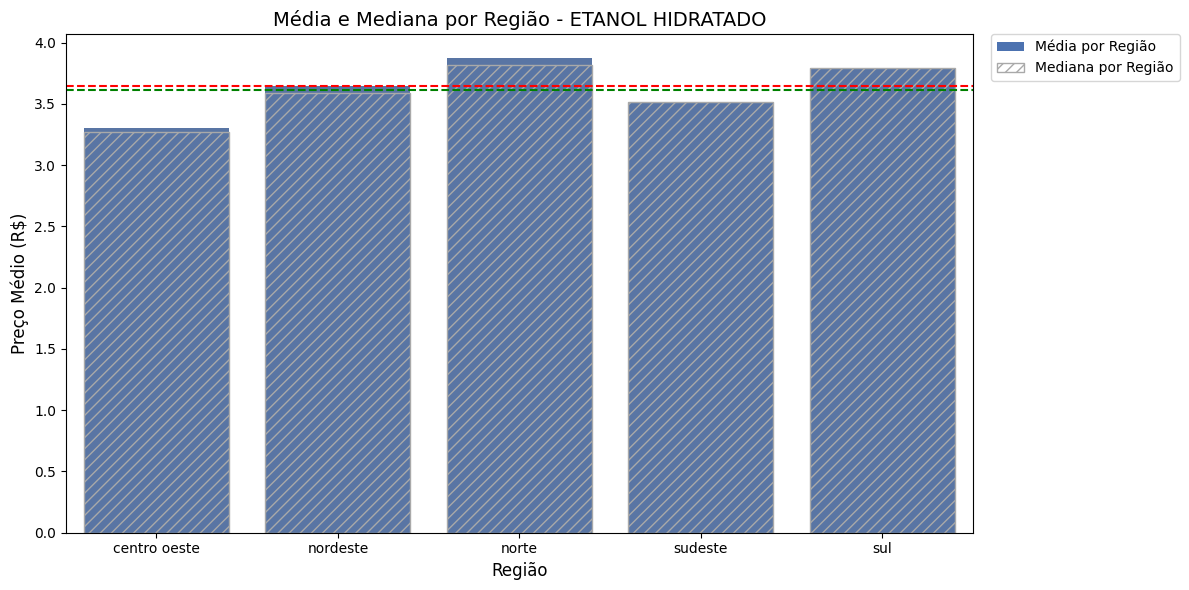

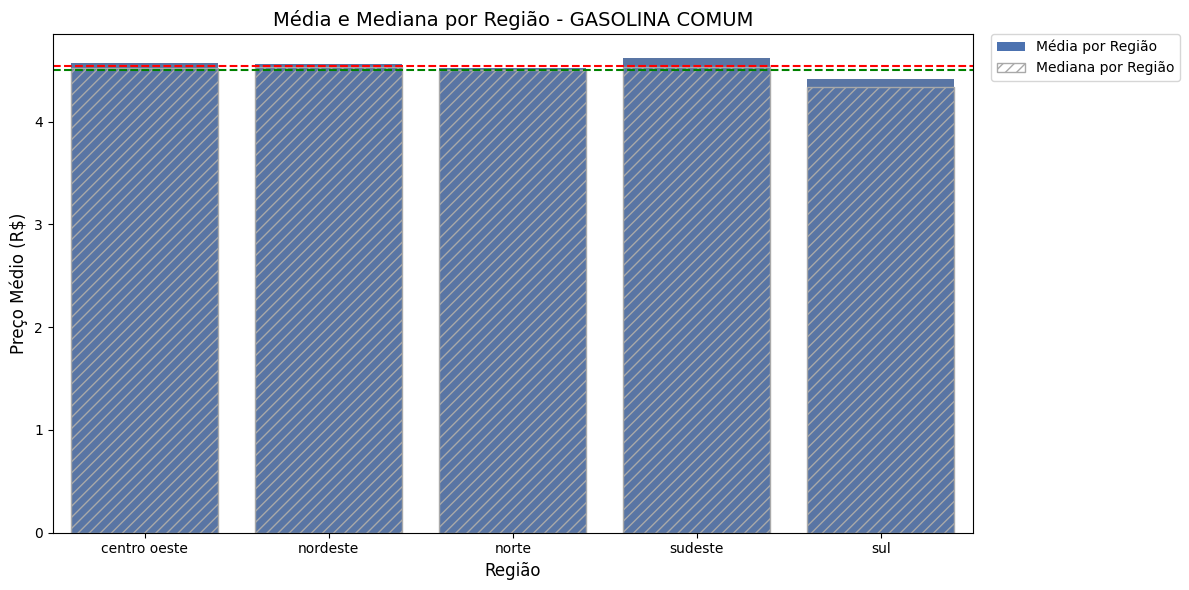

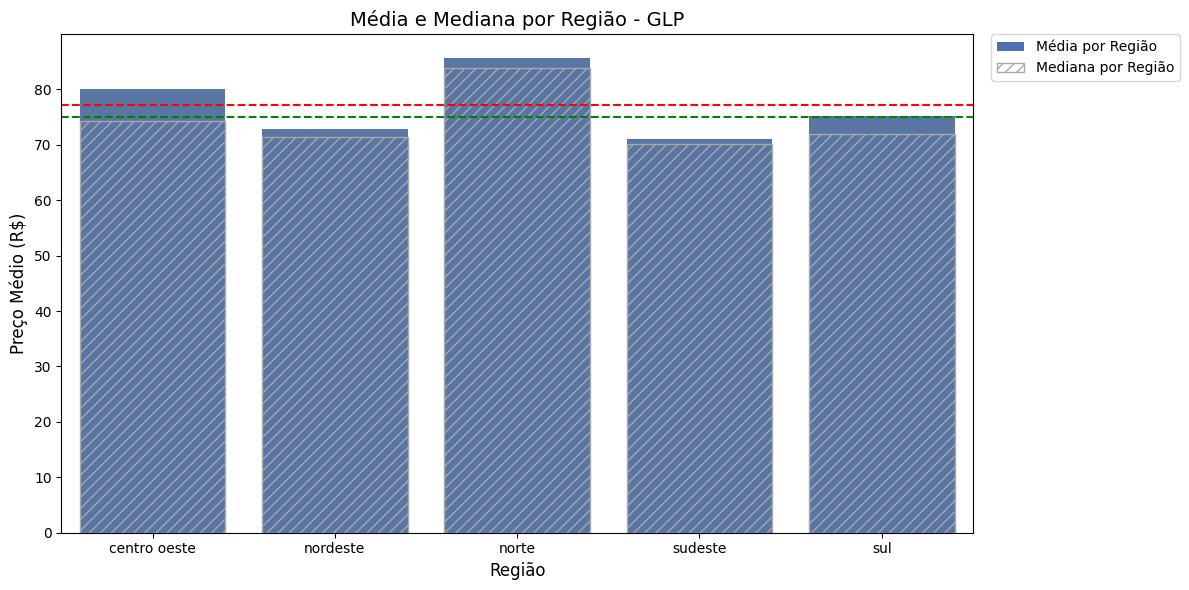

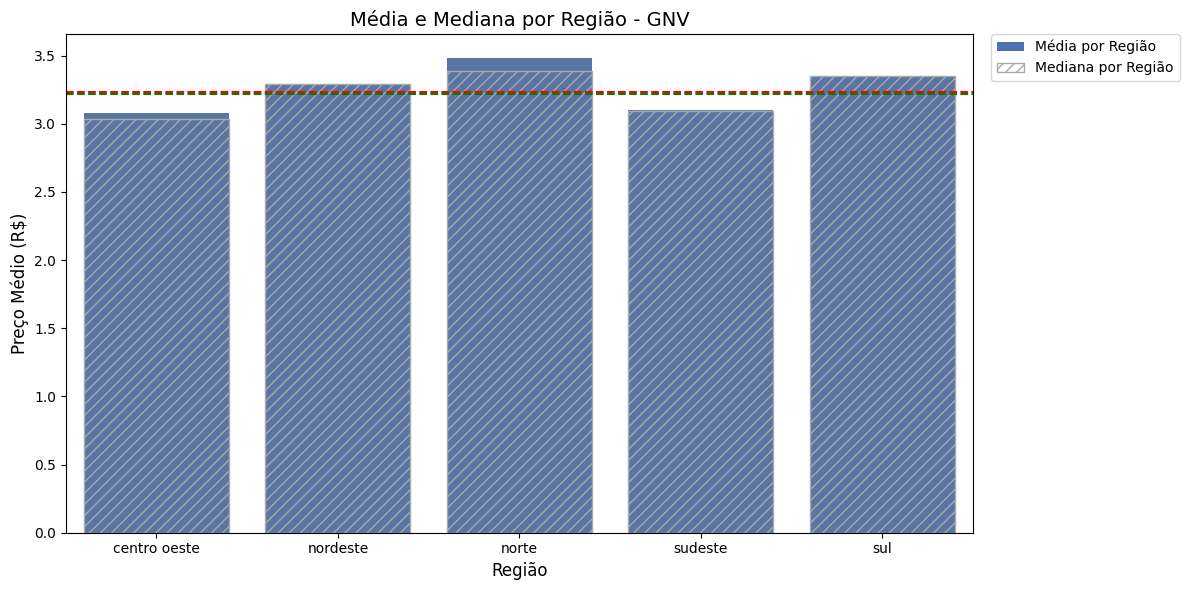

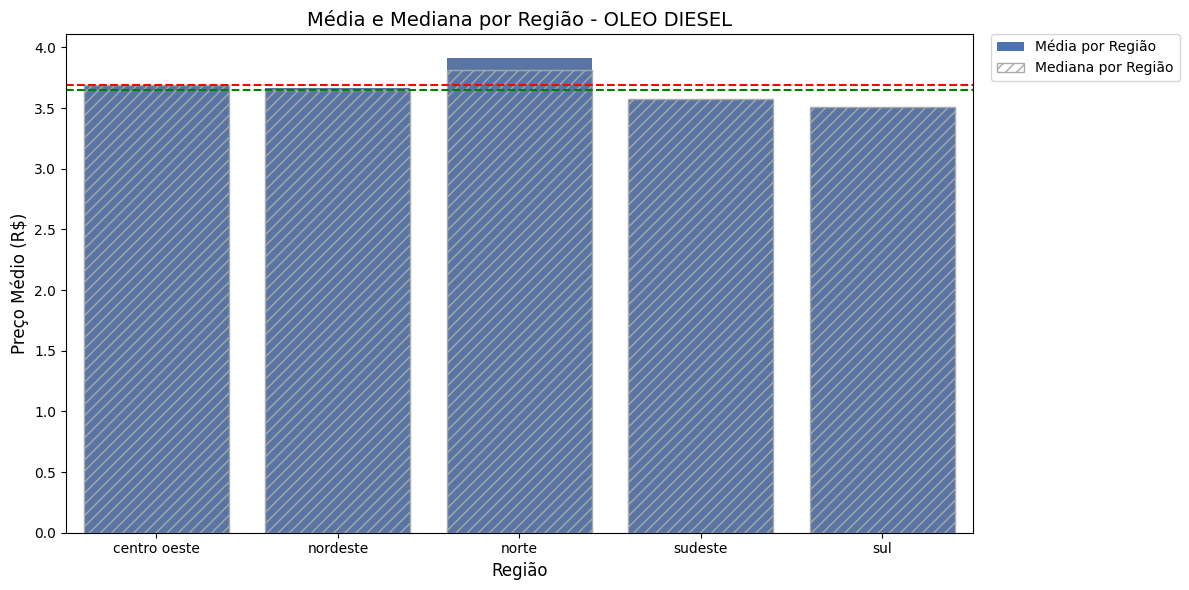

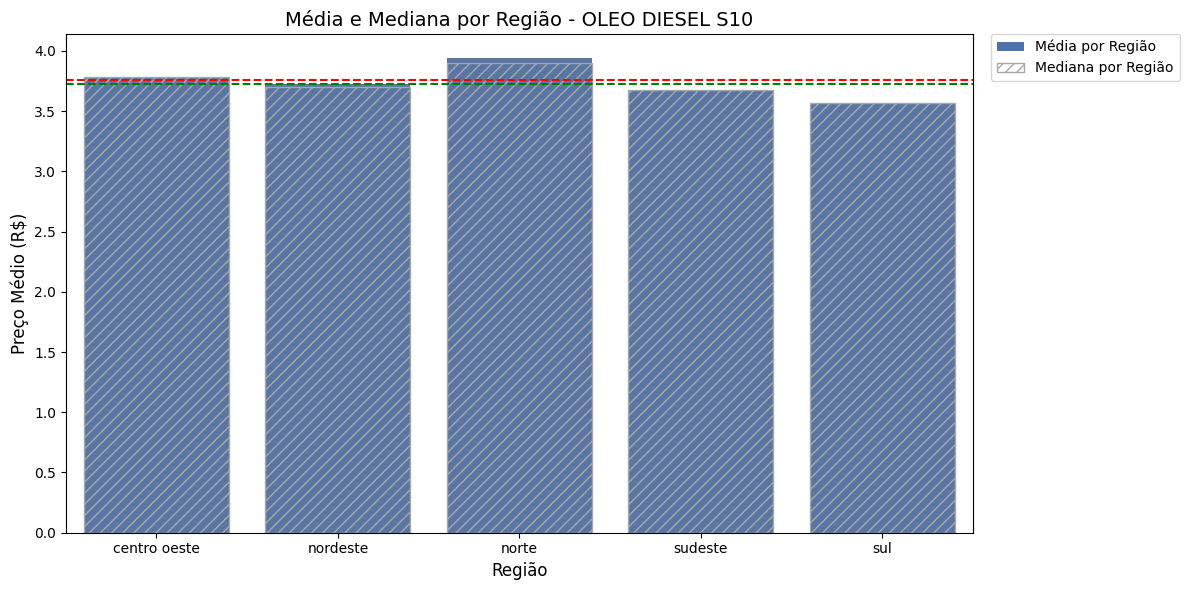

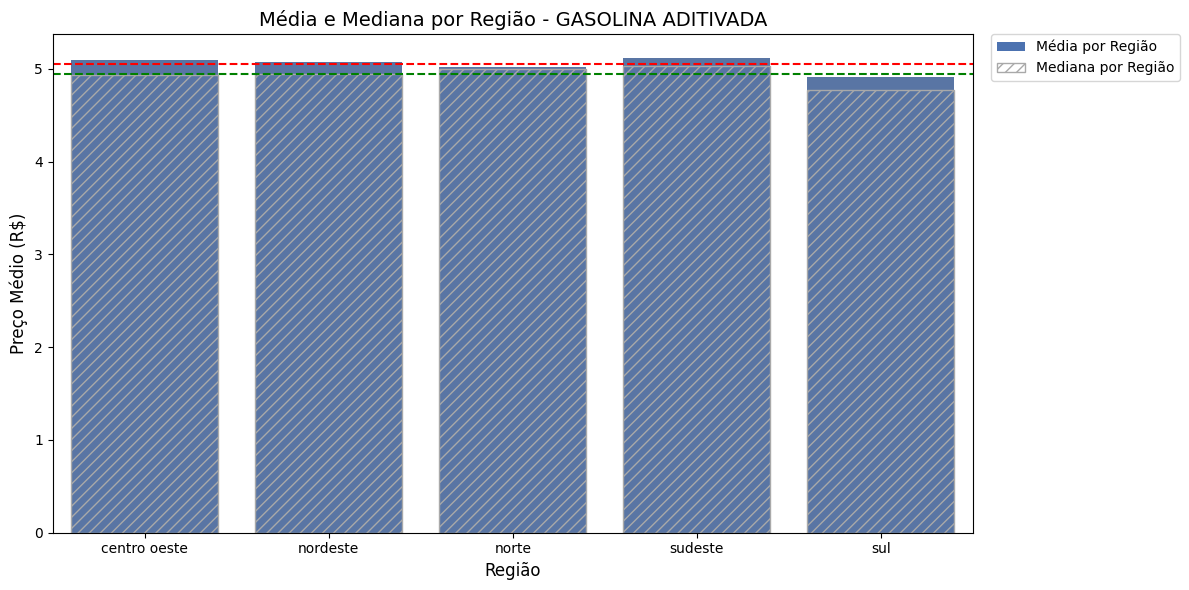

In [ ]:
# Gerar gráficos para cada produto
for produto, estatisticas_regiao in estatisticas_por_produto.items():
    # Garantir que o DataFrame foi redefinido corretamente
    estatisticas_regiao = estatisticas_regiao.reset_index()

    # Criar a figura
    plt.figure(figsize=(12, 6))

    # Gráfico de barras: Média por Região (azul sólido)
    bars_media = sns.barplot(
        data=estatisticas_regiao,
        x="REGIÃO",
        y="Média por Região",
        color="#4c72b0",
        label="Média por Região"
    )

    # Gráfico de barras: Mediana por Região (com hachuras)
    bars_mediana = sns.barplot(
        data=estatisticas_regiao,
        x="REGIÃO",
        y="Mediana por Região",
        color="#4c72b0",
        hatch="///",  # Adiciona hachura às barras
        edgecolor="#a9a9a9",  # Contorno em cinza leve
        linewidth=1,  # Contorno mais fino
        label="Mediana por Região"
    )

    # Linhas horizontais para Média Geral e Mediana Geral
    plt.axhline(
        y=estatisticas_regiao["Média Geral"].iloc[0],
        color="red",
        linestyle="--",
        label="Média Geral"
    )
    plt.axhline(
        y=estatisticas_regiao["Mediana Geral"].iloc[0],
        color="green",
        linestyle="--",
        label="Mediana Geral"
    )

    # Título e rótulos
    plt.title(f"Média e Mediana por Região - {produto.upper()}", fontsize=14)
    plt.xlabel("Região", fontsize=12)
    plt.ylabel("Preço Médio (R$)", fontsize=12)

    # Legenda com patches personalizados e ajustada para fora do gráfico
    media_patch = mpatches.Patch(facecolor="#4c72b0", label="Média por Região")
    mediana_patch = mpatches.Patch(facecolor="none", hatch="///", edgecolor="#a9a9a9", label="Mediana por Região")
    plt.legend(
        handles=[media_patch, mediana_patch],
        loc="upper left",
        bbox_to_anchor=(1.02, 1),  # Move a legenda para fora do gráfico
        borderaxespad=0,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

<font color="lightgreen"> ***Análise*** </font><br>

**Diferenças entre o período pré e durante a pandemia**

A comparação entre os dados pré-pandemia (2004-2019) e durante a pandemia (2020-2021) revela mudanças significativas em diversas métricas relacionadas aos combustíveis. Essas diferenças podem ser contextualizadas pelas dinâmicas econômicas, logísticas e comportamentais impostas pela COVID-19.

In [ ]:
# Adicionar colunas de ano inicial e final
combustivel_df['ano_inicial'] = combustivel_df['DATA INICIAL'].dt.year
combustivel_df['ano_final'] = combustivel_df['DATA FINAL'].dt.year

# Filtrar dados do período de 2004 a 2019 e criar uma cópia
df_combustivel_pre_pandemia = combustivel_df[
    (combustivel_df['ano_inicial'].between(2004, 2019)) &
    (combustivel_df['ano_final'].between(2004, 2019))
].copy()  # Garante uma cópia independente


df_combustivel_pre_pandemia.describe(include = 'number')

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ano_inicial,ano_final
count,110731.000000,110731.000000,110731.000000,110731.000000,110731.000000,107212.000000,110731.000000,107245.000000,107245.000000,107245.000000,107245.000000,107245.000000,110731.000000,110731.000000
mean,231.038255,11.054116,0.669207,9.578772,12.765278,2.265696,0.045423,8.715859,0.569830,7.554873,9.981321,0.046384,2012.056299,2012.071172
std,399.140315,18.153769,1.375669,15.447441,21.352995,4.463814,0.024981,13.937639,1.284243,11.972381,16.313861,0.041854,4.513181,4.512785
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000,2004.000000,2004.000000
25%,42.000000,2.091000,0.073000,1.930000,2.360000,0.285000,0.029000,1.813000,0.048000,1.692500,1.965800,0.021000,2008.000000,2008.000000
50%,103.000000,2.760000,0.116000,2.560000,3.072000,0.386000,0.041000,2.375000,0.078000,2.250000,2.551500,0.030000,2012.000000,2012.000000
75%,238.000000,3.824000,0.194000,3.590000,4.280000,0.566000,0.058000,3.379000,0.152000,3.217000,3.587400,0.060000,2016.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.395000,83.137000,18.385000,83.000000,94.500000,0.780000,2019.000000,2019.000000


In [ ]:
df_combustivel_pandemia.describe(include = 'number')

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ano_inicial,ano_final
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,4515.000000,9941.000000,4522.000000,4522.000000,4522.000000,4522.000000,4522.000000,9941.000000,9941.000000
mean,110.986722,16.072129,0.846121,14.358416,18.364809,3.691438,0.043940,13.540457,0.828389,12.107620,15.216847,0.044672,2020.303692,2020.321296
std,200.872626,27.525013,1.664638,24.398461,31.671916,6.779054,0.022169,21.403810,1.676419,19.023519,24.338052,0.034525,0.459874,0.466998
min,1.000000,2.000000,0.000000,1.799000,2.000000,0.003000,0.000000,1.738000,0.000000,1.543100,1.816000,0.000000,2020.000000,2020.000000
25%,24.000000,3.500000,0.120000,3.249000,3.900000,0.396000,0.029000,2.886500,0.080000,2.688700,3.098975,0.024000,2020.000000,2020.000000
50%,47.000000,3.973000,0.170000,3.699000,4.499000,0.499000,0.042000,3.322500,0.121000,3.144900,3.556000,0.038000,2020.000000,2020.000000
75%,113.000000,4.870000,0.252000,4.599000,5.339000,0.758000,0.057000,3.989750,0.222000,3.850000,4.245100,0.059000,2021.000000,2021.000000
max,1664.000000,107.500000,8.240000,100.000000,120.000000,27.158000,0.172000,78.595000,13.336000,77.030000,87.500000,0.591000,2021.000000,2021.000000


**Preço Médio de Revenda:**

Média Pré-Pandemia: R$ 11,05.

Média Durante a Pandemia: R$ 16,07.

Observa-se um aumento acentuado nos preços de revenda durante a pandemia, refletindo a crise global de logística, o aumento nos custos de produção e transporte, e a instabilidade econômica que impactou a cadeia de combustíveis.

**Margem Média de Revenda:**

Média Pré-Pandemia: R$ 2,27.

Média Durante a Pandemia: R$ 3,69.

O aumento na margem de revenda sugere que os revendedores repassaram os custos elevados aos consumidores, mas também pode indicar ajustes para compensar a redução no volume de vendas devido à queda na demanda durante períodos de lockdown.

**Desvios Padrão de Preço (Revenda e Distribuição):**

Desvio Padrão da Revenda:
Pré-Pandemia: R$ 0,67.

Durante a Pandemia: R$ 0,85.

Desvio Padrão da Distribuição:
Pré-Pandemia: R$ 0,57.

Durante a Pandemia: R$ 0,83.

O aumento dos desvios padrão demonstra que as diferenças entre os preços médios em diferentes locais ou períodos se tornaram mais pronunciadas durante a pandemia, reforçando a ideia de uma maior instabilidade nos preços.

**Preço Mínimo e Máximo de Revenda:**

Mínimo:
Pré-Pandemia: R$ 0,77.

Durante a Pandemia: R$ 2,00.

Máximo:
Pré-Pandemia: R$ 99,36.

Durante a Pandemia: R$ 107,50.

Durante a pandemia, tanto os preços mínimos quanto os máximos aumentaram, indicando uma elevação generalizada dos custos, ainda que os preços mais altos tenham atingido níveis extremos apenas em casos isolados.

**Fonte:** https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/impactos-da-pandemia-de-covid-19-no-mercado-brasileiro-de-combustiveis?utm_source=chatgpt.com

## 3. Entenda a distribuição de variáveis como de data / região / preço / produtos de cada região.
a) Quais foram as regiões com os valores mais altos e qual período? Assim como os valores mais baixos e suas respectivas datas.

b) Plote histogramas / boxplots

<font color="lightgreen"> ***Análise*** </font><br>

Para compreender a distribuição das variáveis, buscamos analisar como o preço de cada produto varia ao longo do tempo e entre as regiões. Utilizamos a coluna 'PRODUTO', que contém 7 categorias, em conjunto com os dados da coluna 'PREÇO MÉDIO REVENDA', para calcular a média de preço de cada produto. Para agrupar os dados temporalmente, consideramos as informações da coluna 'DATA INICIAL', enquanto para a análise regional, utilizamos a coluna 'REGIÃO'.


Analisando o produto: ETANOL HIDRATADO
Estatísticas descritivas:
Média: R$ 2.44
Mediana: R$ 2.28
Desvio Padrão: R$ 0.74
Valor Mínimo: R$ 0.77
Valor Máximo: R$ 5.96



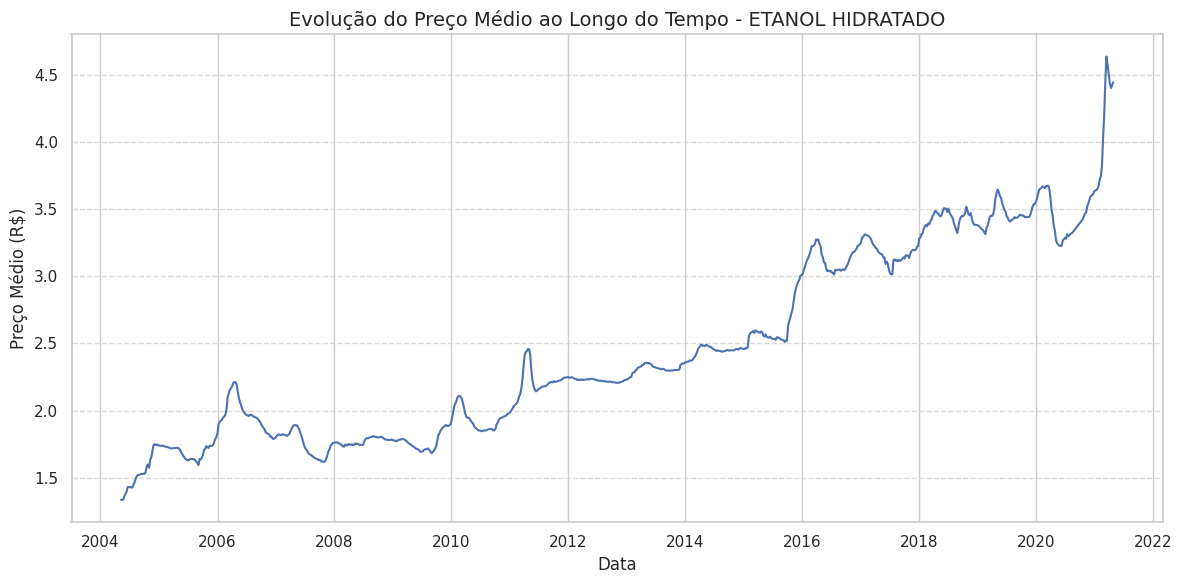

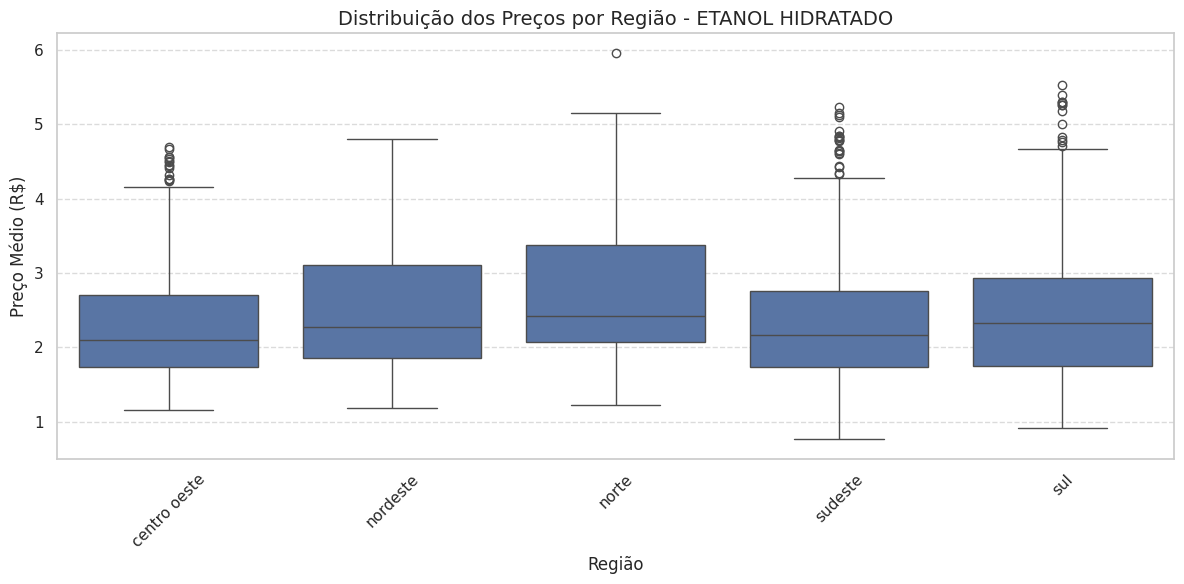


Analisando o produto: GASOLINA COMUM
Estatísticas descritivas:
Média: R$ 3.20
Mediana: R$ 2.87
Desvio Padrão: R$ 0.77
Valor Mínimo: R$ 1.89
Valor Máximo: R$ 6.69



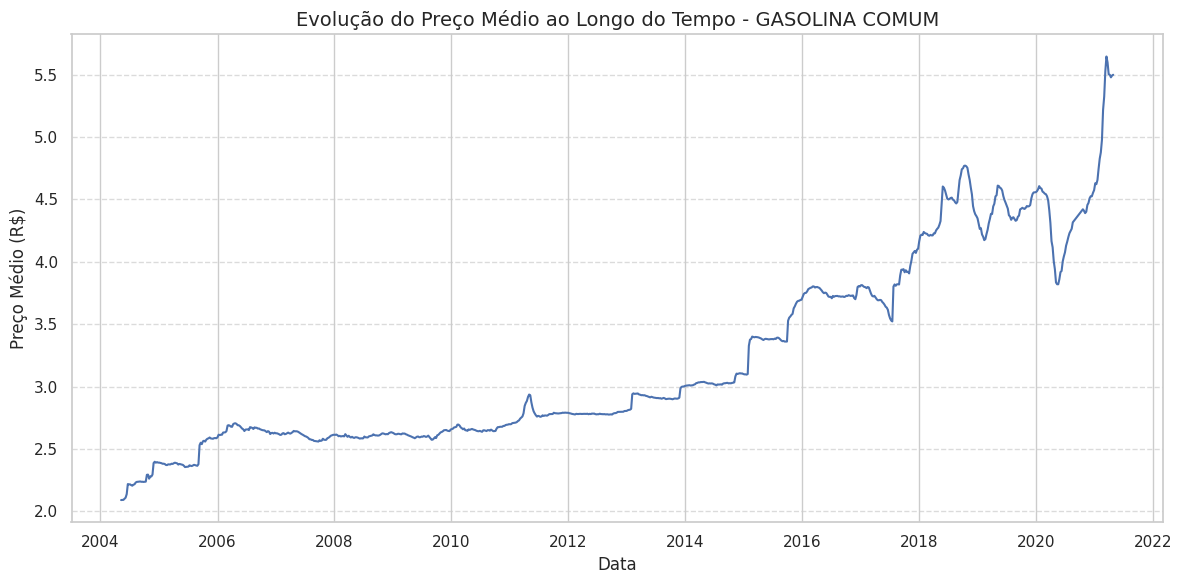

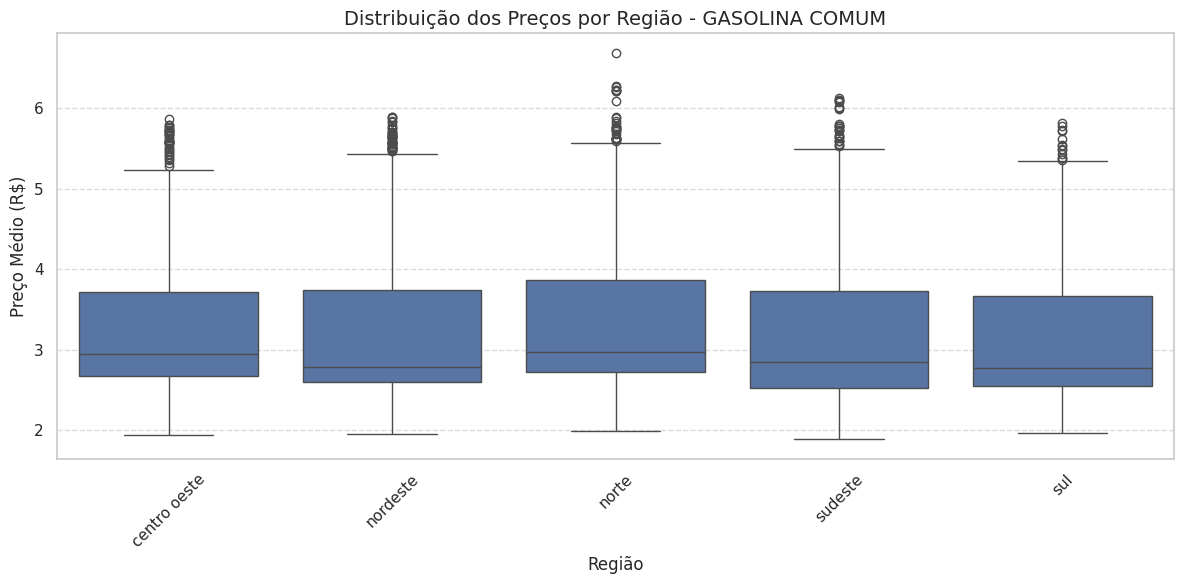


Analisando o produto: GLP
Estatísticas descritivas:
Média: R$ 47.66
Mediana: R$ 41.37
Desvio Padrão: R$ 15.93
Valor Mínimo: R$ 28.03
Valor Máximo: R$ 107.50



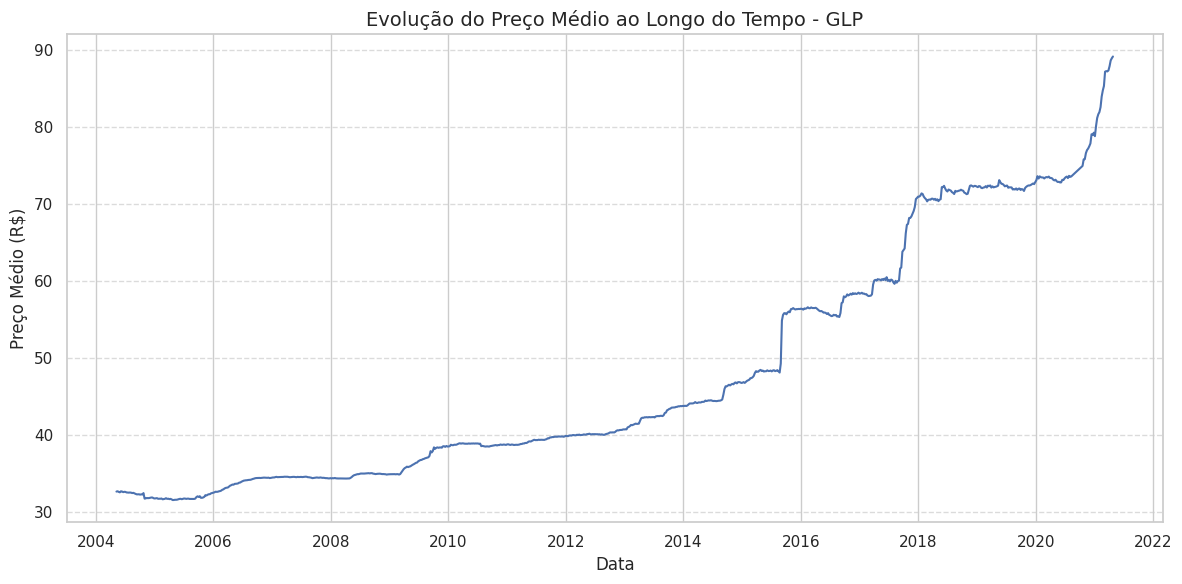

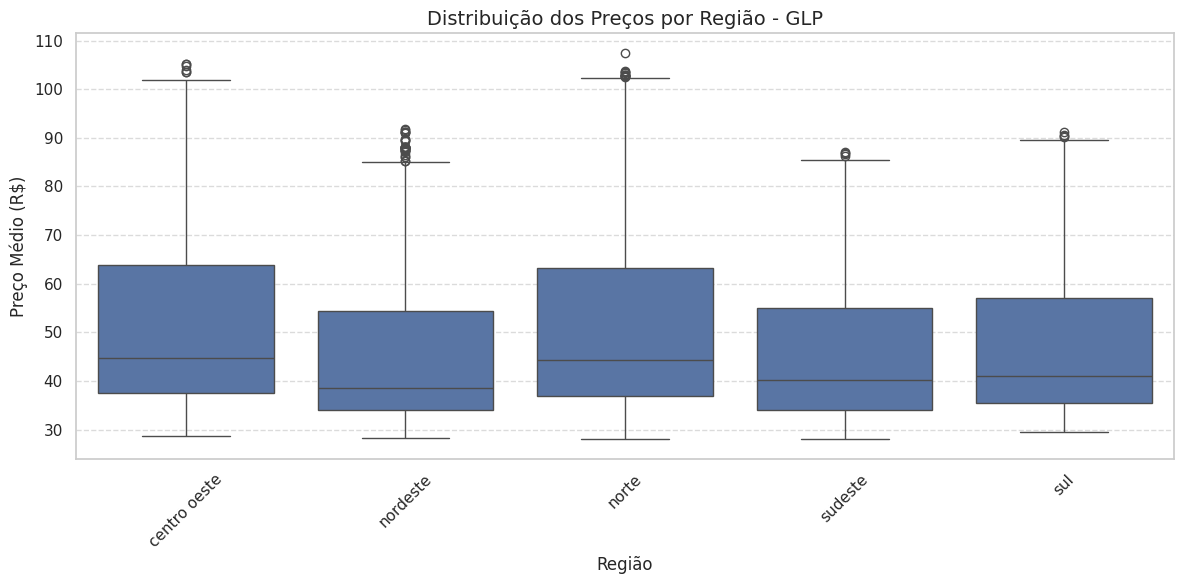


Analisando o produto: GNV
Estatísticas descritivas:
Média: R$ 2.03
Mediana: R$ 1.85
Desvio Padrão: R$ 0.65
Valor Mínimo: R$ 0.97
Valor Máximo: R$ 4.78



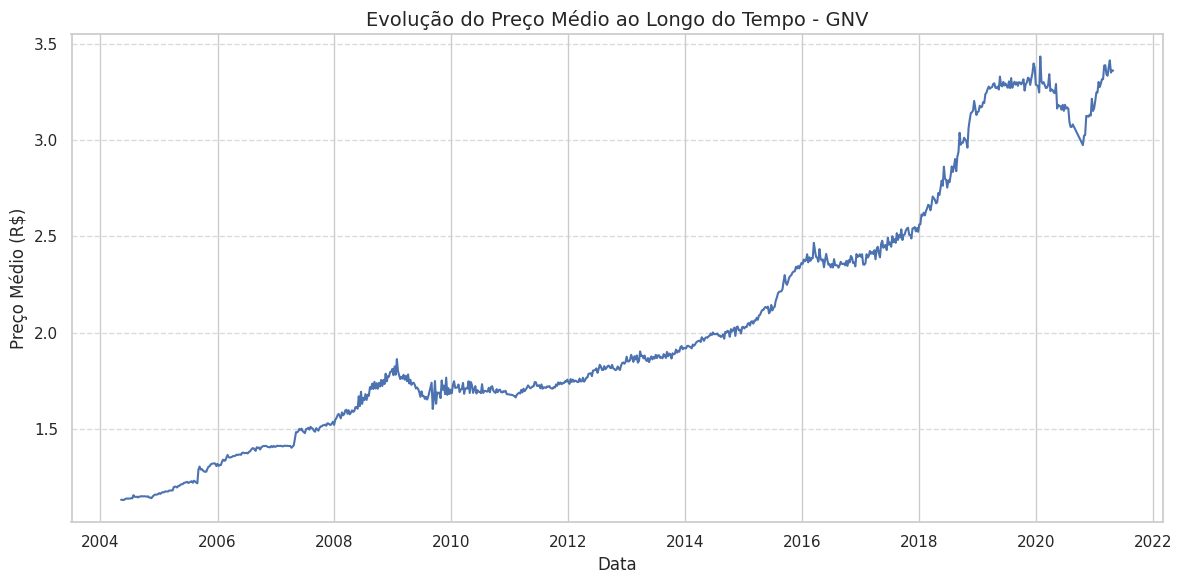

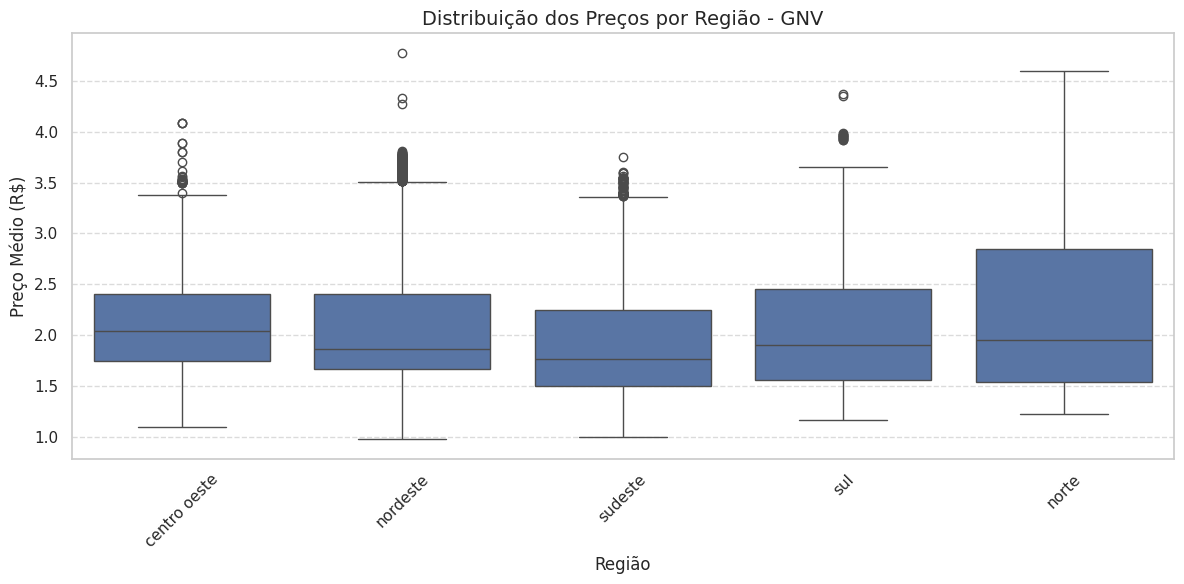


Analisando o produto: OLEO DIESEL
Estatísticas descritivas:
Média: R$ 2.55
Mediana: R$ 2.29
Desvio Padrão: R$ 0.71
Valor Mínimo: R$ 1.31
Valor Máximo: R$ 5.85



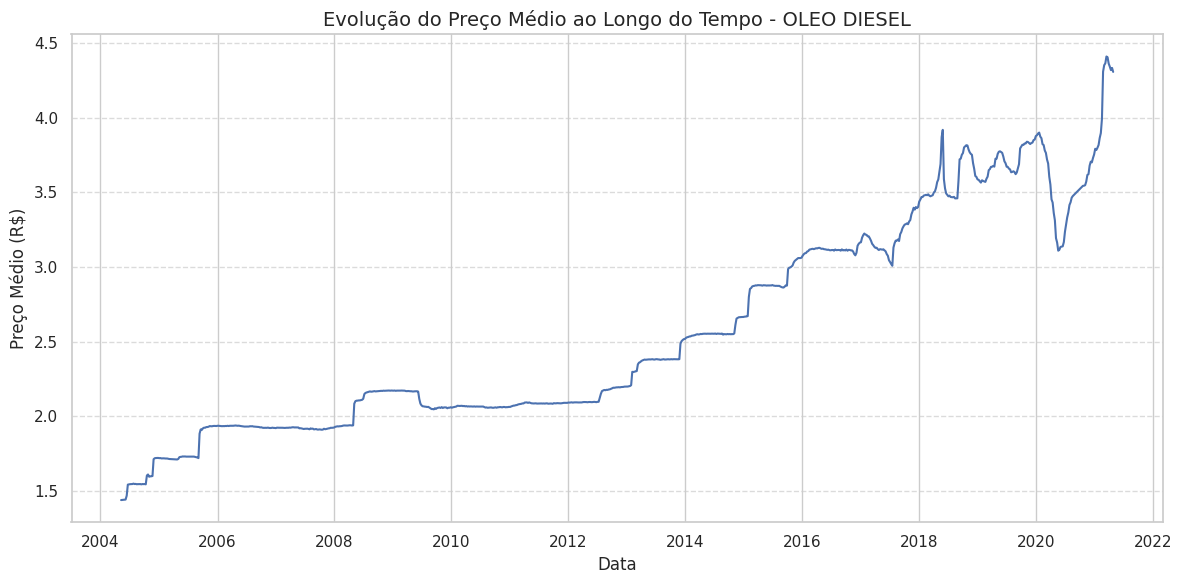

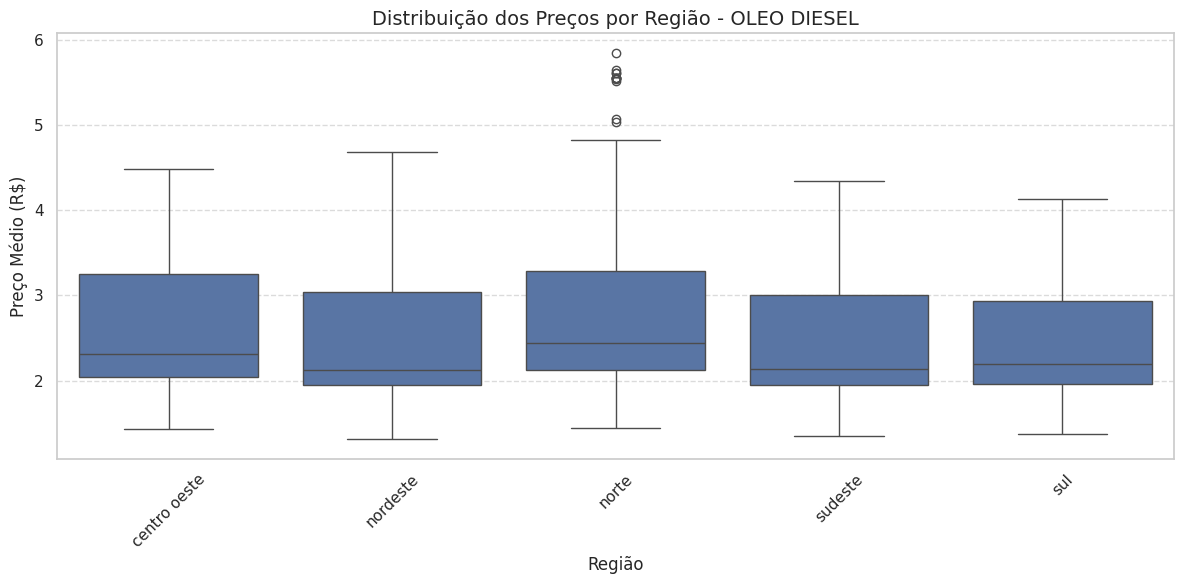


Analisando o produto: OLEO DIESEL S10
Estatísticas descritivas:
Média: R$ 3.27
Mediana: R$ 3.26
Desvio Padrão: R$ 0.53
Valor Mínimo: R$ 2.13
Valor Máximo: R$ 5.86



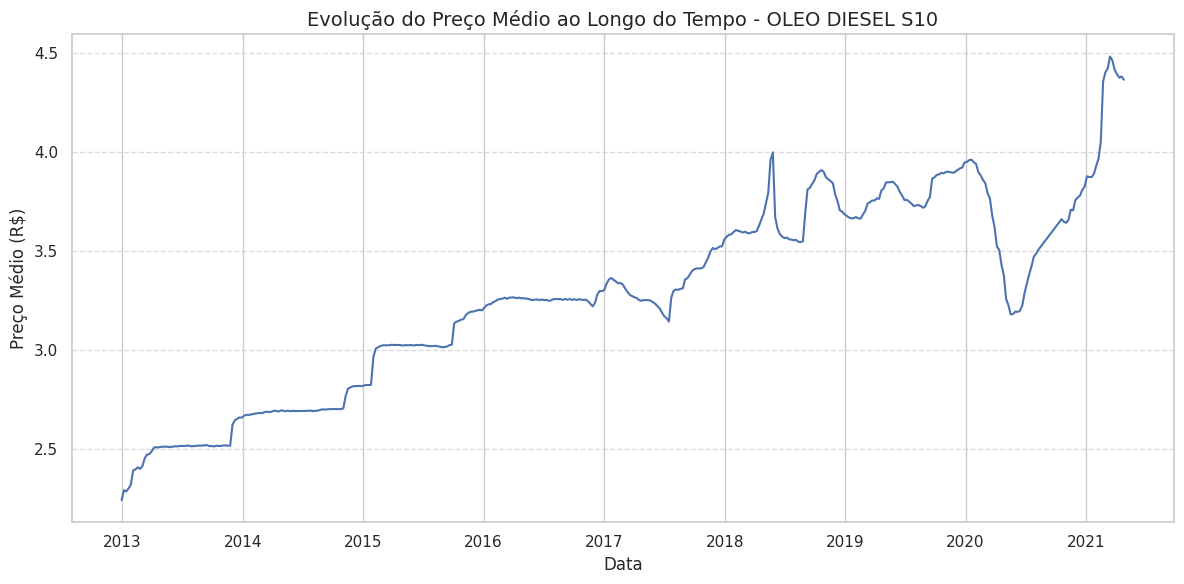

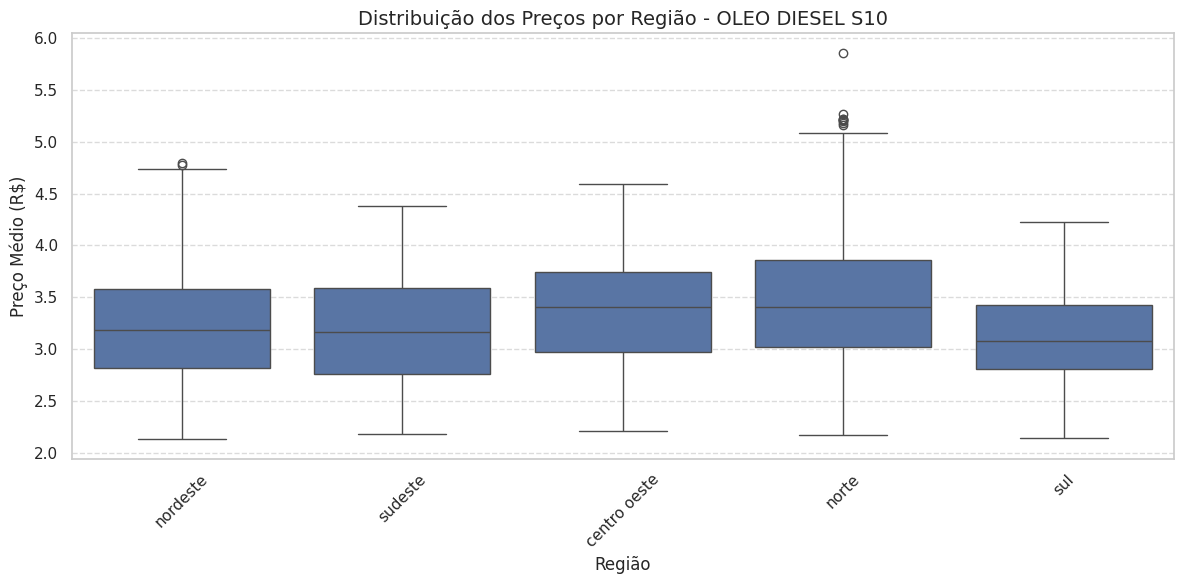


Analisando o produto: GASOLINA ADITIVADA
Estatísticas descritivas:
Média: R$ 5.05
Mediana: R$ 4.94
Desvio Padrão: R$ 0.51
Valor Mínimo: R$ 3.85
Valor Máximo: R$ 6.68



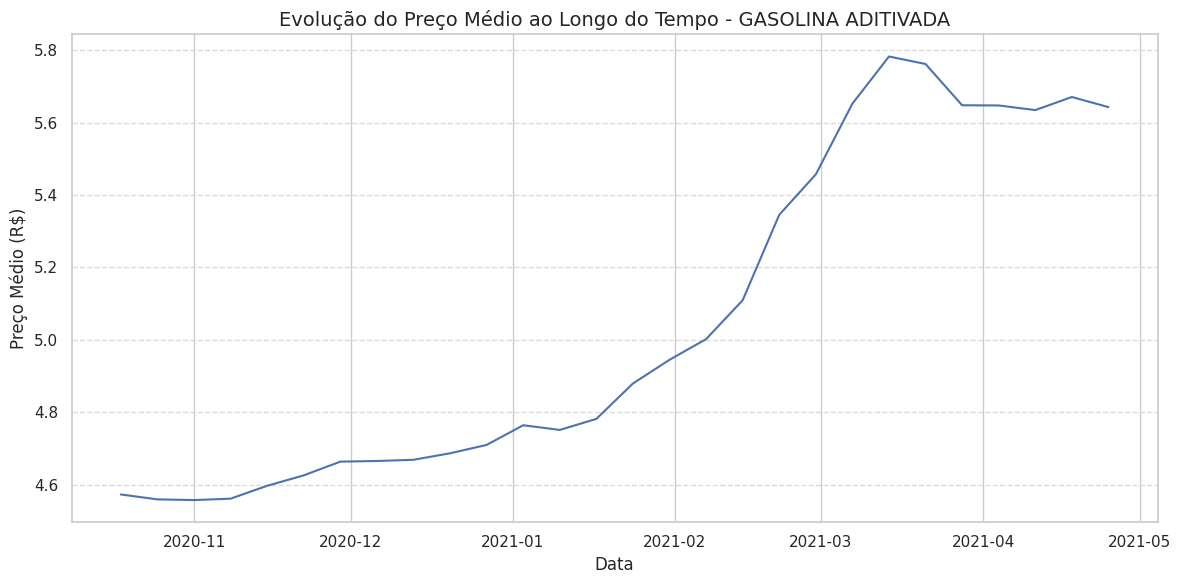

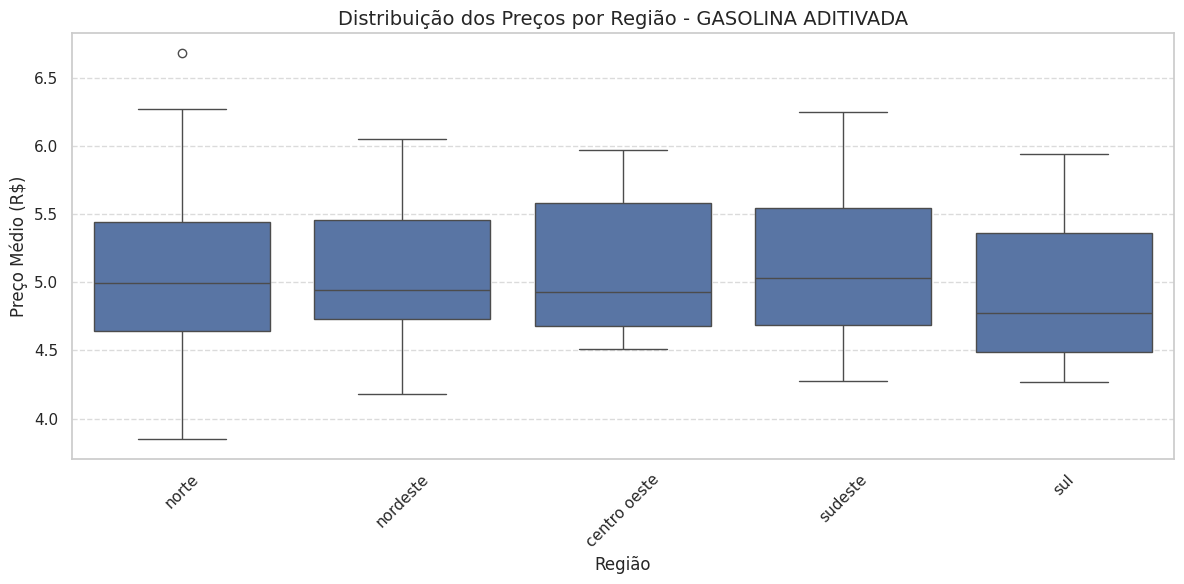

In [ ]:
# Lista de produtos
produtos = ['etanol hidratado', 'gasolina comum', 'glp', 'gnv', 'oleo diesel', 'oleo diesel s10', 'gasolina aditivada']

# Análise visual e descritiva
for produto in produtos:
    print(f"\nAnalisando o produto: {produto.upper()}")

    # Filtrar dados do produto
    df_produto = df_combustivel[df_combustivel["PRODUTO"] == produto]

    # Estatísticas descritivas
    estatisticas = df_produto["PREÇO MÉDIO REVENDA"].agg(["mean", "median", "std", "min", "max"])
    print("Estatísticas descritivas:")
    print(f"Média: R$ {estatisticas['mean']:.2f}")
    print(f"Mediana: R$ {estatisticas['median']:.2f}")
    print(f"Desvio Padrão: R$ {estatisticas['std']:.2f}")
    print(f"Valor Mínimo: R$ {estatisticas['min']:.2f}")
    print(f"Valor Máximo: R$ {estatisticas['max']:.2f}\n")

    # Gráfico de linha para preços ao longo do tempo
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_produto,
        x="DATA INICIAL",
        y="PREÇO MÉDIO REVENDA",
        errorbar=None,
        color='#4c72b0'  # Cor ajustada para o azul padrão
    )
    plt.title(f"Evolução do Preço Médio ao Longo do Tempo - {produto.upper()}", fontsize=14)
    plt.xlabel("Data", fontsize=12)
    plt.ylabel("Preço Médio (R$)", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Gráfico de boxplot para preços por região
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_produto,
        x="REGIÃO",
        y="PREÇO MÉDIO REVENDA",
        color='#4c72b0',  # Cor ajustada para o azul padrão
        dodge=False
    )
    plt.title(f"Distribuição dos Preços por Região - {produto.upper()}", fontsize=14)
    plt.xlabel("Região", fontsize=12)
    plt.ylabel("Preço Médio (R$)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

<font color="lightgreen"> ***Análise*** </font><br>


De maneira geral, observa-se uma tendência de aumento nos preços dos produtos ao longo do tempo. Um ponto em comum entre todos os produtos é o pico de preços durante o período da pandemia, evidenciando o impacto significativo desse evento sanitário. Outro destaque é o pico observado em 2016, coincidindo com o impeachment da presidente, o que sugere que fatores políticos também influenciam diretamente os preços dos combustíveis. Esses padrões indicam que os preços são afetados por múltiplos fatores, incluindo crises políticas e sanitárias. É importante notar que o período de preços mais baixos corresponde aos registros mais antigos, enquanto os preços mais altos foram alcançados durante a pandemia.

Em relação às regiões, há uma considerável sobreposição nos preços dos produtos, refletindo a alta variabilidade dos valores entre diferentes localidades. Contudo, destaca-se que a região Norte apresenta o maior número de outliers altos, sugerindo que os preços nessa região são mais propensos a flutuações extremas. Essa observação pode estar relacionada a desafios logísticos e à menor infraestrutura de refino e distribuição nessa área.

## 4. Você notou diferenças nítidas dos preços em um curto período de tempo? Você percebeu uma grande diferença de valores nas regiões/estados no mesmo período?

<font color="lightgreen"> ***Análise*** </font><br>

Para responder à questão proposta, foi adotado um recorte temporal **semanal** para as análises. Essa decisão baseia-se no fato de que os preços de combustíveis no Brasil são frequentemente ajustados em intervalos curtos, refletindo alterações no mercado internacional, mudanças tributárias e custos logísticos. Estudos conduzidos pela Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) utilizam levantamentos semanais como referência, tornando esse recorte ideal para identificar oscilações pontuais e rápidas no mercado.

**Fonte**: https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos-de-combustiveis-ultimas-semanas-pesquisadas

Para verificar as diferenças de preços, aplicamos um teste **ANOVA**. Não foi possível selecionar o período mais recente devido à ausência de dados de preços nos anos de 2020 e 2021. Por essa razão, escolhemos uma semana do ano de 2019 para realizar a análise.

In [ ]:
# Criar uma cópia do DataFrame original
df_combustivel_var = df_combustivel.copy()

# Filtrar o DataFrame para o ano de 2019
df_combustivel_var = df_combustivel_var[df_combustivel_var["DATA INICIAL"].dt.year == 2019]

# Filtrar para uma semana específica (exemplo: semana de 1º de janeiro de 2020)
semana_especifica = (df_combustivel_var["DATA INICIAL"] >= "2019-01-06") & (df_combustivel_var["DATA FINAL"] <= "2019-01-12")
df_combustivel_var = df_combustivel_var[semana_especifica]

# Teste ANOVA entre regiões
grupos_regioes = [df_combustivel_var[df_combustivel_var["REGIÃO"] == regiao]["PREÇO MÉDIO REVENDA"] for regiao in df_combustivel_var["REGIÃO"].unique()]
anova_regioes = f_oneway(*grupos_regioes)

# Resultados para regiões
print("Teste ANOVA entre Regiões:")
print(f"F-valor: {anova_regioes.statistic:.4f}, p-valor: {anova_regioes.pvalue:.4f}")
if anova_regioes.pvalue < 0.05:
    print("Há diferença significativa nos preços médios de revenda entre as regiões.")
else:
    print("Não há diferença significativa nos preços médios de revenda entre as regiões.")

# Teste ANOVA entre estados
grupos_estados = [df_combustivel_var[df_combustivel_var["ESTADO"] == estado]["PREÇO MÉDIO REVENDA"] for estado in df_combustivel_var["ESTADO"].unique()]
anova_estados = f_oneway(*grupos_estados)

# Resultados para estados
print("\nTeste ANOVA entre Estados:")
print(f"F-valor: {anova_estados.statistic:.4f}, p-valor: {anova_estados.pvalue:.4f}")
if anova_estados.pvalue < 0.05:
    print("Há diferença significativa nos preços médios de revenda entre os estados.")
else:
    print("Não há diferença significativa nos preços médios de revenda entre os estados.")

Teste ANOVA entre Regiões:
F-valor: 0.1989, p-valor: 0.9386
Não há diferença significativa nos preços médios de revenda entre as regiões.

Teste ANOVA entre Estados:
F-valor: 0.0438, p-valor: 1.0000
Não há diferença significativa nos preços médios de revenda entre os estados.


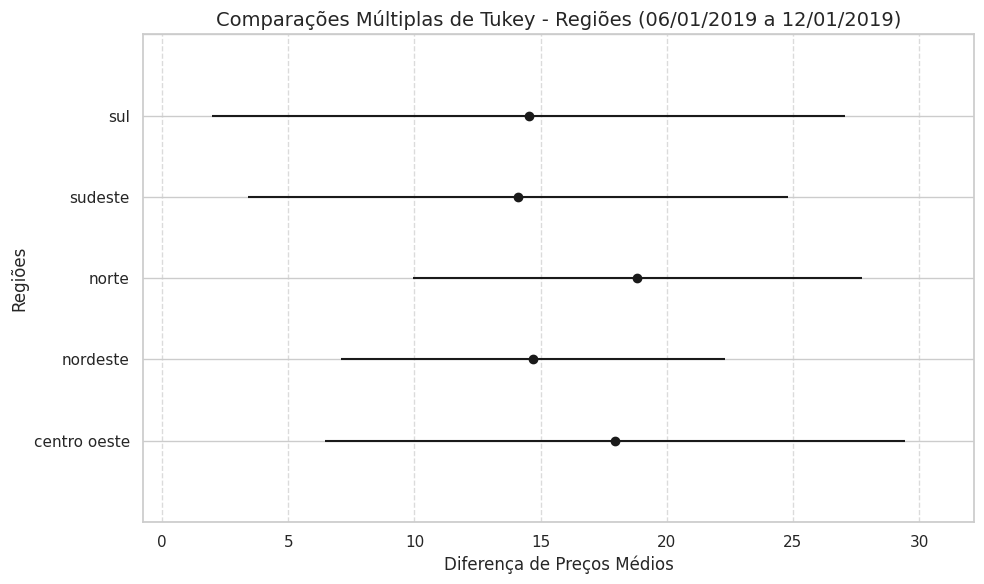

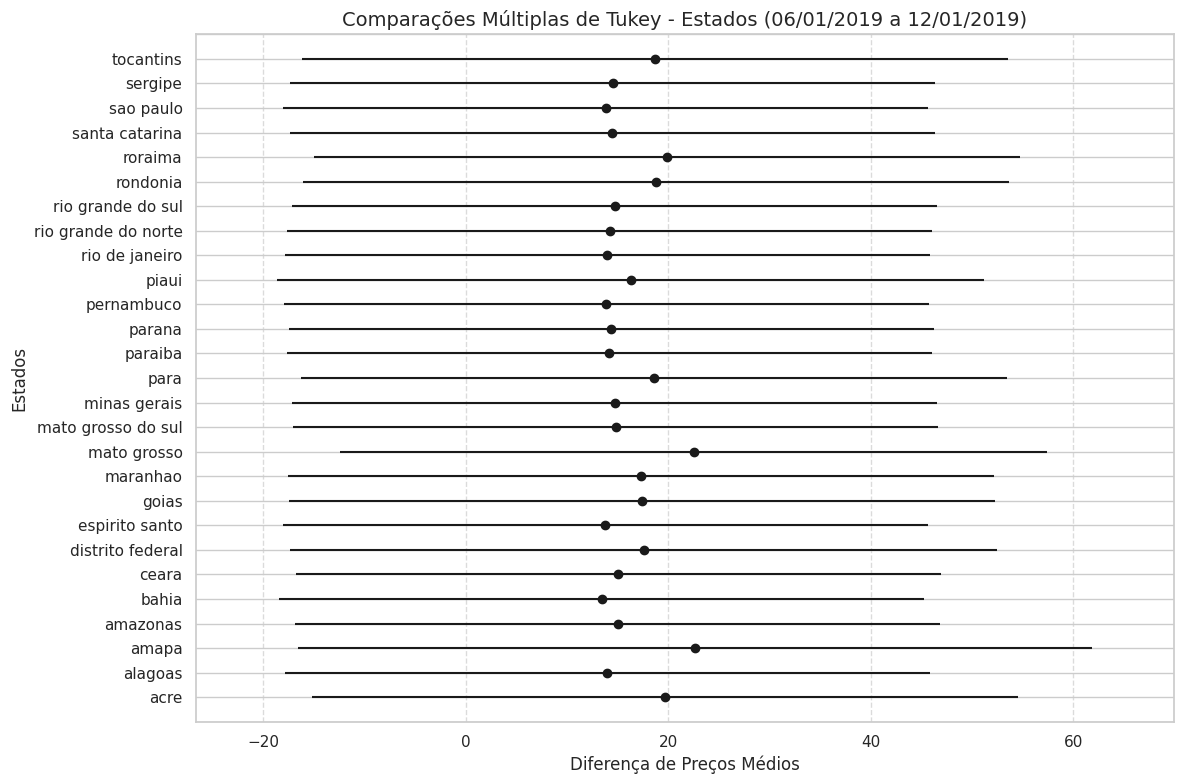

In [ ]:
# Teste post hoc de Tukey para as regiões
tukey_regioes = pairwise_tukeyhsd(
    endog=df_combustivel_var['PREÇO MÉDIO REVENDA'],  # Variável dependente
    groups=df_combustivel_var['REGIÃO'],             # Grupos (regiões)
    alpha=0.05                                       # Nível de significância
)

# Plotar os resultados do teste de Tukey para as regiões
fig = tukey_regioes.plot_simultaneous(figsize=(10, 6))
plt.title("Comparações Múltiplas de Tukey - Regiões (06/01/2019 a 12/01/2019)", fontsize=14)
plt.xlabel("Diferença de Preços Médios", fontsize=12)
plt.ylabel("Regiões", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Teste post hoc de Tukey para os estados
tukey_estados = pairwise_tukeyhsd(
    endog=df_combustivel_var['PREÇO MÉDIO REVENDA'],  # Variável dependente
    groups=df_combustivel_var['ESTADO'],             # Grupos (estados)
    alpha=0.05                                       # Nível de significância
)

# Plotar os resultados do teste de Tukey para os estados
fig = tukey_estados.plot_simultaneous(figsize=(12, 8))
plt.title("Comparações Múltiplas de Tukey - Estados (06/01/2019 a 12/01/2019)", fontsize=14)
plt.xlabel("Diferença de Preços Médios", fontsize=12)
plt.ylabel("Estados", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<font color="lightgreen"> ***Análise*** </font><br>

O teste ANOVA não identificou diferenças significativas na média dos preços semanais, seja entre as regiões ou entre os estados. Para uma análise visual, realizamos o teste post hoc de Tukey HSD, que evidencia a sobreposição dos preços entre as regiões e estados, confirmando a ausência de diferenças significativas.

# Modelagem


## 5.	Seria possível fazer uma previsão de valores para os próximos 5 anos? Construa um modelo de regressão de séries temporais para fazer essa previsão.

<font color="lightgreen"> ***Análise*** </font><br>
A previsão de valores para uma data futura tão distante quanto 5 anos reduz bastante a precisão da modelagem, principalmente para os produtos analisados neste dataset cujos dados possuem muitas variáveis externas e imprevisíveis que podem alterar drasticamente os seus valores (ex. mudança de governo, guerra, mudança de políticas de preços, preço do dólar, entre outros.)

Contudo, por ser uma questão proposta do desafio, iremos realizar a previsão conforme pedido para demonstrar os conhecimentos adquiridos e o raciocínio utilizado na resolução.

A resolução será dividas em passos para melhor demonstrar as etapas de resolução.


<font color="lightblue"> ***Passo 1: Escolha da variável de previsão*** </font><br>

Para a previsão, foi escolhida a variável "preço de revenda". Justificativa:


*   É uma informação relevante para o consumidor e mercado
*   Não possui valores inválidos no dataset



<font color="lightblue"> ***Passo 2: Plotar os gráficos da série temporal (dados gerais)*** </font><br>
O objetivo é visualizar todos os dados para direcionar a análise e modelagem.

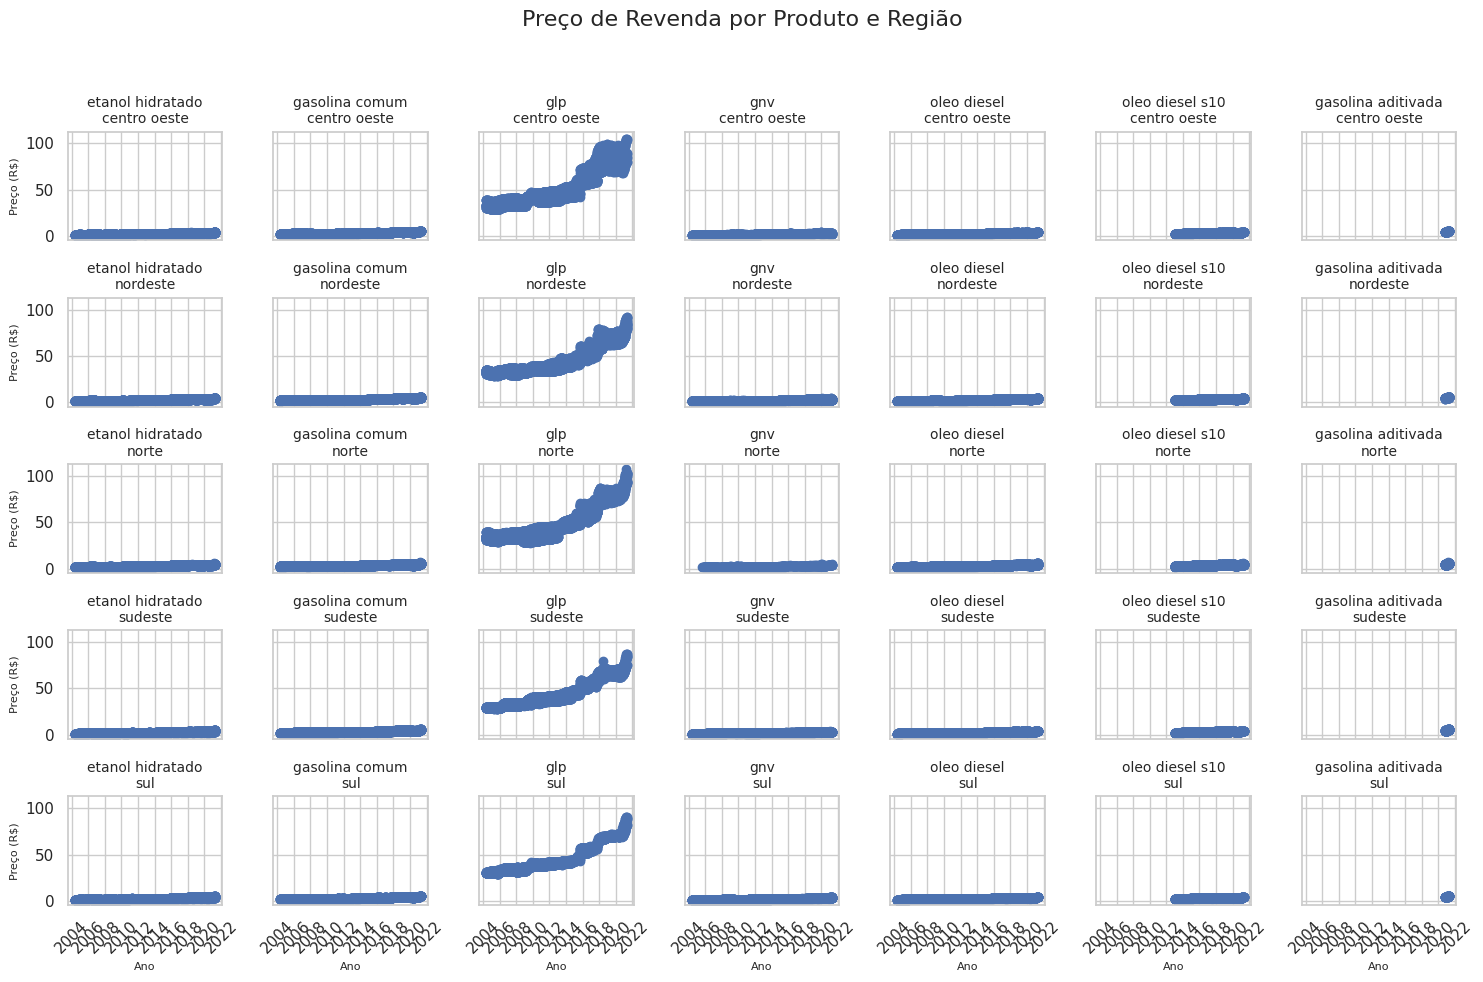

In [ ]:
# Gráfico do preço por produto e por região
# Lista de regiões e produtos
nome_regiao = df_combustivel['REGIÃO'].unique()
nome_produto = df_combustivel['PRODUTO'].unique()

# Tamanho dos dados
num_regioes = len(nome_regiao)
num_produtos = len(nome_produto)

# Criando subplots
fig, axes = plt.subplots(num_regioes, num_produtos, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Preço de Revenda por Produto e Região', fontsize=16)

# Iterar pelas regiões e produtos
for i, regiao in enumerate(nome_regiao):
    for j, produto in enumerate(nome_produto):
        # Filtrar dados por região e produto
        filtro = df_combustivel[
            (df_combustivel['PRODUTO'] == produto) &
            (df_combustivel['REGIÃO'] == regiao)
        ]

        # Selecionar o eixo correspondente
        ax = axes[i, j]

        # Plotar os dados no subplot
        ax.plot(filtro['DATA FINAL'], filtro['PREÇO MÉDIO REVENDA'], marker='o', linestyle='-')
        ax.set_title(f'{produto}\n{regiao}', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

        # Adicionar rótulos apenas para os subplots na borda
        if i == num_regioes - 1:  # Última linha
            ax.set_xlabel('Ano', fontsize=8)
        if j == 0:  # Primeira coluna
            ax.set_ylabel('Preço (R$)', fontsize=8)

# Ajustar espaçamento entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Retângulo para acomodar o título principal
plt.show()

<font color="lightblue"> ***Passo 3: Restringir os dados para a previsão*** </font><br>
Como pode ser visto no gráfico anterior, há uma grande quantidade de dados a serem processados: 5 regiões, 27 unidades federativas e 7 produtos.

Por questões de tempo limitado do desafio e por se tratar da mesma linha de raciocínio para a resolução, apenas um estado será modelado.

Para determinar o estado foi estabelecida a seguinte regra:


*   Estado que possui a maior quantidade de postos de combustíveis pesquisados pois temos uma quantidade maior de dados disponíveis para a análise:



In [ ]:
# Determinação do estado para a análise
# Agrupando os dados por estado
filtro_estado = df_combustivel[['ESTADO','NÚMERO DE POSTOS PESQUISADOS']].groupby('ESTADO').count()
filtro_estado.sort_values('NÚMERO DE POSTOS PESQUISADOS', ascending=False)

,NÚMERO DE POSTOS PESQUISADOS
ESTADO,
sao paulo,4819
paraiba,4819
rio grande do sul,4819
bahia,4819
rio de janeiro,4819
rio grande do norte,4818
santa catarina,4818
minas gerais,4817
espirito santo,4815


<font color="lightgreen"> ***Análise*** </font><br>
Alguns estados apresentaram a mesma quantidade de postos pesquisados. Portanto, adotou-se outro critério para a escolha:


*   O estado que mais consome gasolina no Brasil

O produto gasolina foi escolhido por ser o combustível mais vendido.

Diante disso, o estado que será utilizado na análise é São Paulo. Segundo a pesquisa tida como base para a escolha, São Paulo é o estado com o maior consumo de gasolina C no Brasil entre os anos de 2001 e 2008 (período de estudo da pesquisa).



[Artigo da referência](https://doi.org/10.1590/S0103-63512010000300001)

<font color="lightblue"> ***Passo 4: Criação de um dataframe específico para esta análise*** </font><br>

Para a modelagem foi criada cópia do dataframe original e com apenas as colunas de interesse. Além disso, foi escolhido trabalhar com a coluna 'data final' para ter o último dia da semana da pesquisa como marcador nos gráficos.

In [ ]:
# Filtragem dos dados de interesse
filtro_sp = df_combustivel[df_combustivel['ESTADO'] == 'sao paulo']

# Criando um DataFrame para a análise da série temporal
df_combustivel_sp = pd.DataFrame(columns=['DATA FINAL', 'PRODUTO','PREÇO MÉDIO REVENDA'])

colunas_interesse = ['DATA FINAL', 'PRODUTO','PREÇO MÉDIO REVENDA']

for coluna in colunas_interesse:
  df_combustivel_sp[coluna] = filtro_sp[coluna]

df_combustivel_sp

,DATA FINAL,PRODUTO,PREÇO MÉDIO REVENDA
23,2004-05-15,etanol hidratado,0.768
50,2004-05-22,etanol hidratado,0.766
77,2004-05-29,etanol hidratado,0.823
104,2004-06-05,etanol hidratado,0.887
131,2004-06-12,etanol hidratado,0.894
...,...,...,...
120723,2021-05-01,gasolina comum,5.265
120750,2021-05-01,glp,85.340
120767,2021-05-01,gnv,3.150
120793,2021-05-01,oleo diesel,4.134


<font color="lightblue"> ***Passo 5: Plotar os gráficos da série temporal (São Paulo)*** </font><br>
O objetivo é visualizar todos os dados para direcionar a análise e modelagem.

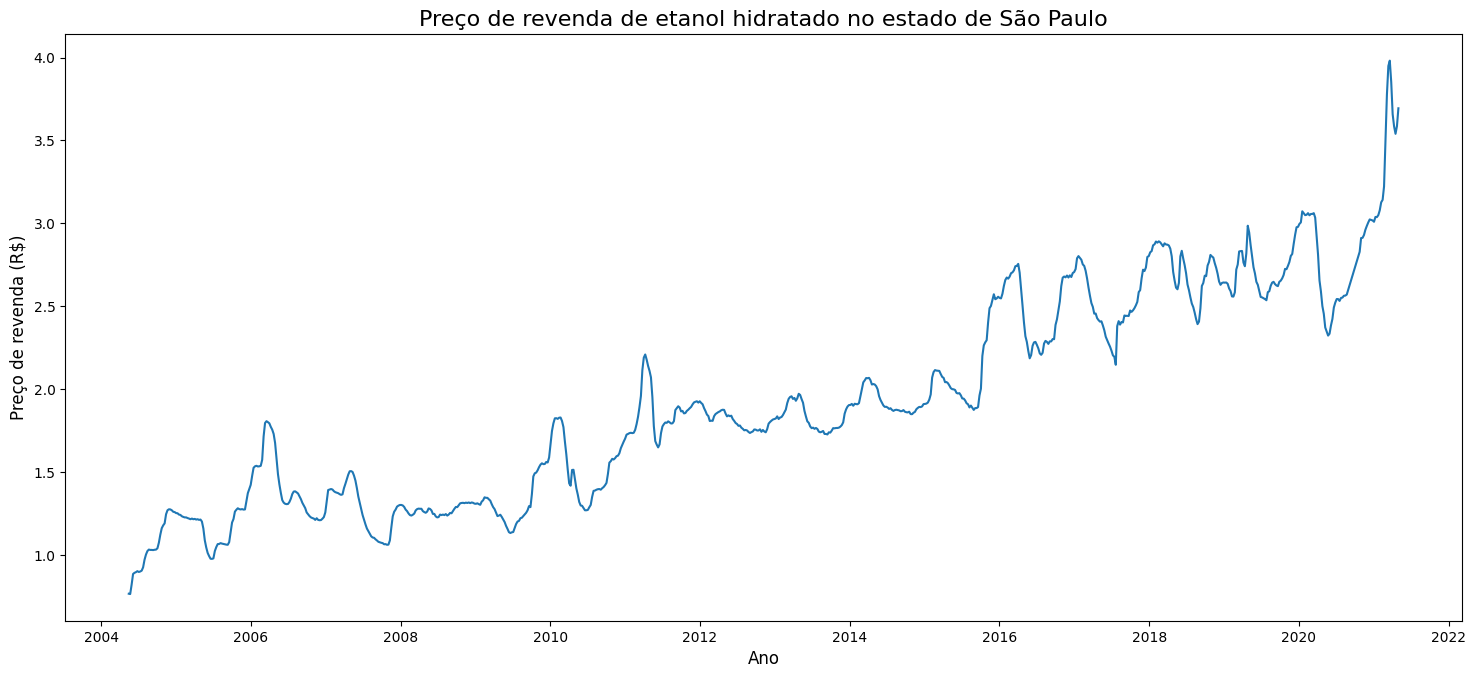

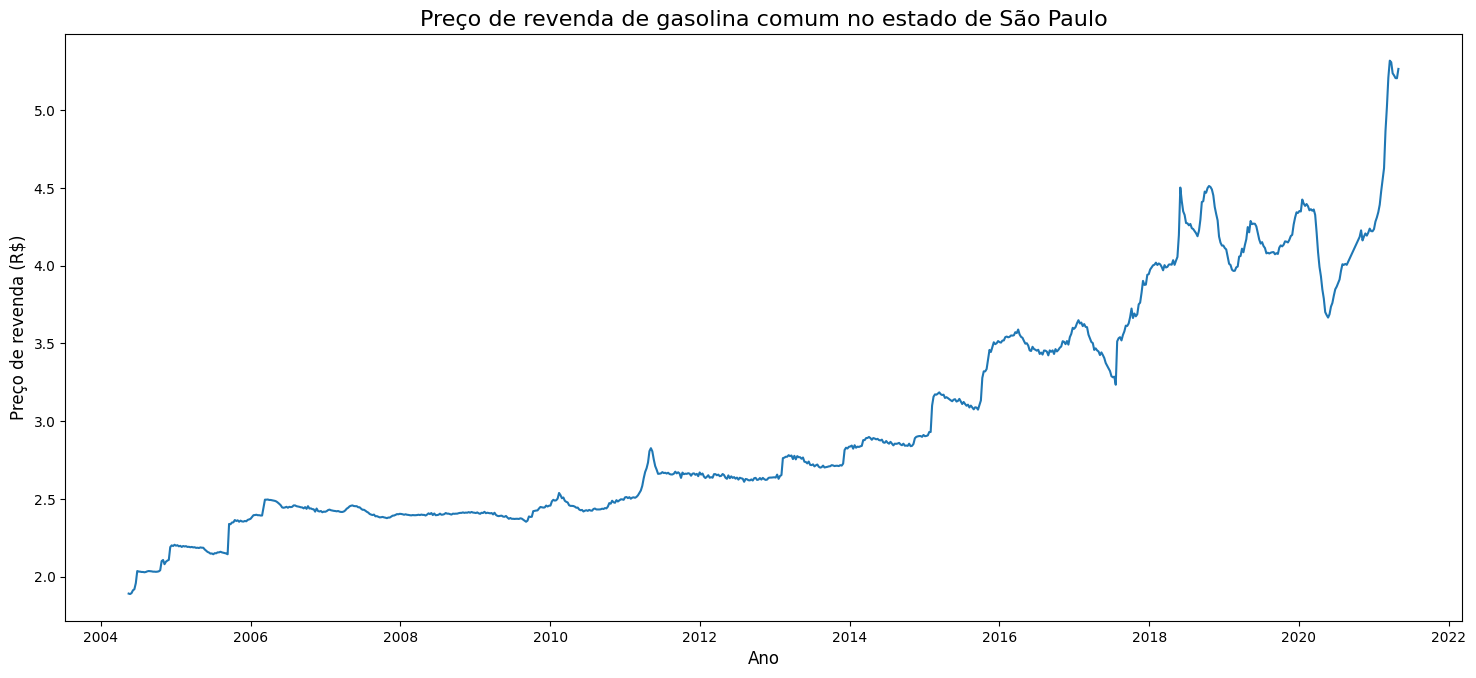

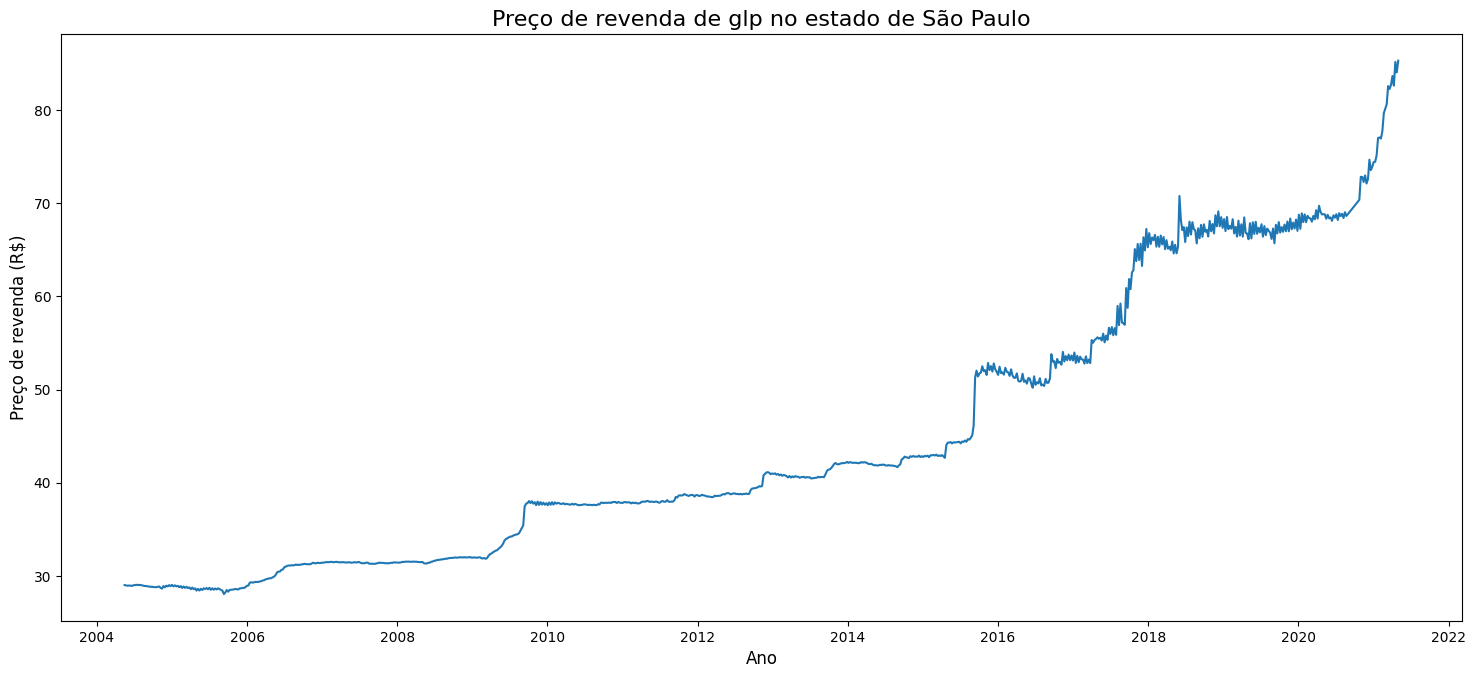

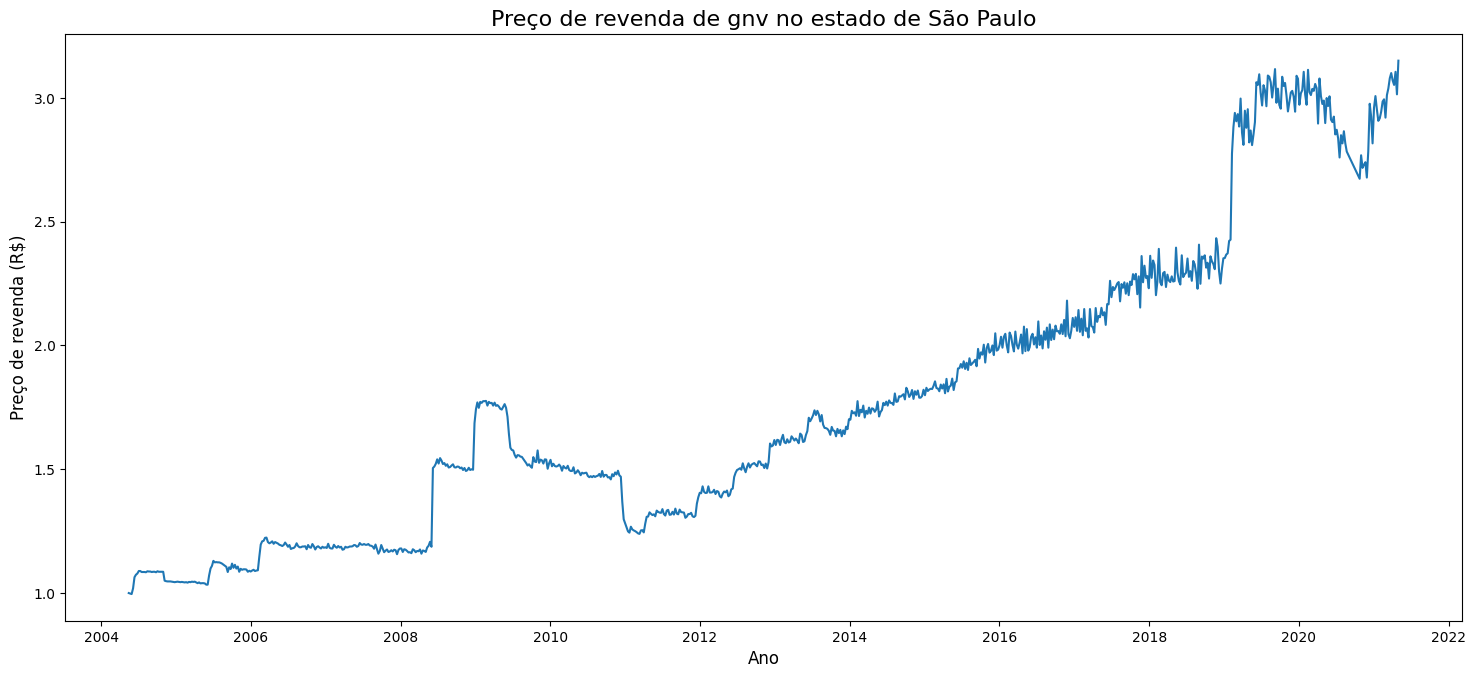

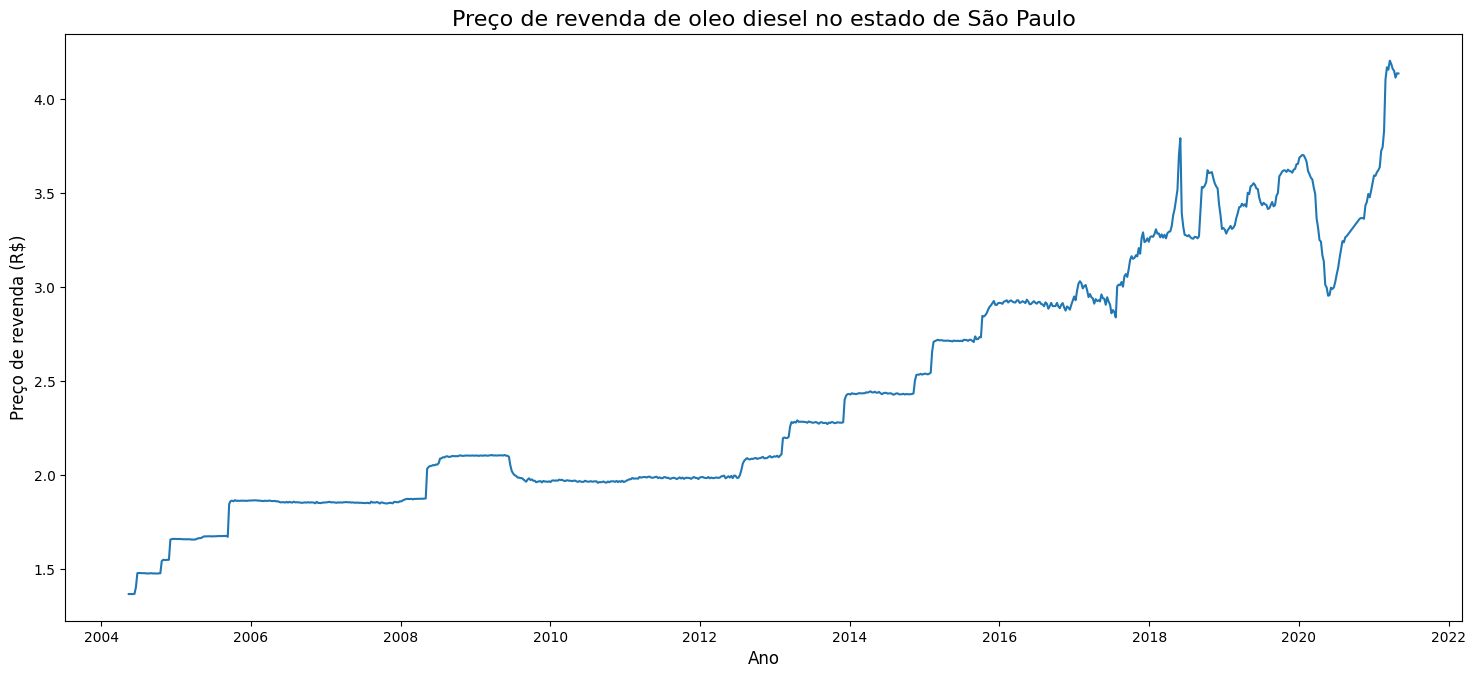

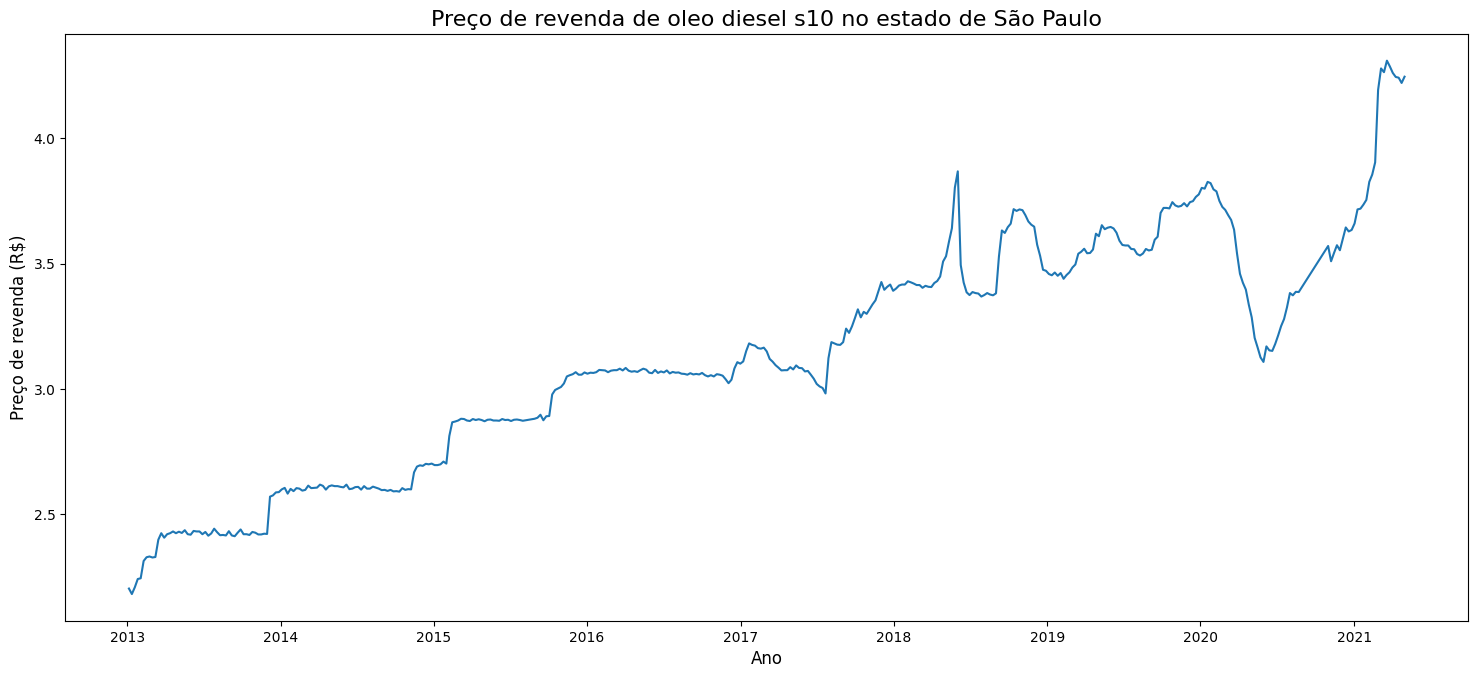

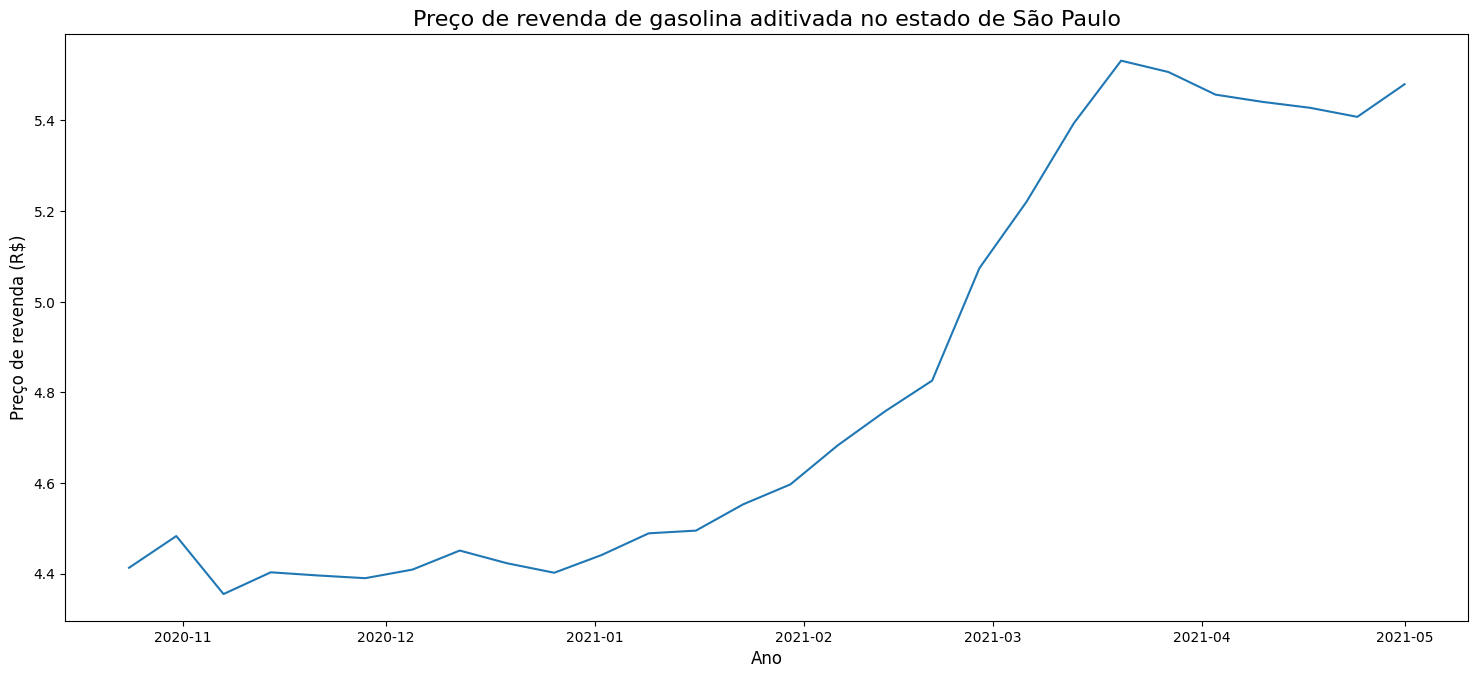

In [ ]:
# Gráfico do preço por produto e por região
def print_preco(produto):
  filtro = df_combustivel_sp[df_combustivel_sp['PRODUTO'] == produto]

  fig, ax = plt.subplots(figsize=(15, 7))
  ax.plot(filtro['DATA FINAL'], filtro['PREÇO MÉDIO REVENDA'])
  ax.set_title(f'Preço de revenda de {produto} no estado de São Paulo', fontsize=16)
  ax.set_xlabel('Ano', fontsize=12)
  ax.set_ylabel('Preço de revenda (R$)', fontsize=12)


  plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.5)
  plt.show()


nome_produto = df_combustivel_sp['PRODUTO'].unique()

for produto in nome_produto:
  print_preco(produto)


<font color="lightgreen"> ***Análise*** </font><br>
Uma observação importante feita a partir dos gráficos, é que o período de observação muda para alguns produtos, ex. gasolina aditivada. Portanto, ao invés de transformar os dados com date_range, outra abordagem será realizada para se adaptar melhor a modelagem.

<font color="lightblue"> ***Passo 6: Separação dos dados por produto e ano*** </font><br>
O objetivo é separar os dados de forma mais adequada para realizar a previsão.

A análise e previsão serão feitas para cada produto separadamente seguindo os seguintes passos:


*   Filtragem do produto
*   Transformação da coluna 'DATA FINAL' para DatetimeIndex
*   Teste de estacionaridade
*   Transformação para uma série estacionária (se for o caso)
*   Decomposição da série temporal
*   Previsão





---


<font color="orange"> ***Etanol*** </font><br>


---



####Filtragem do produto


In [ ]:
#filtro para o etanol
df_etanol = df_combustivel_sp[df_combustivel_sp['PRODUTO'] == 'etanol hidratado'].copy()

####Transformação da coluna 'DATA FINAL' para DatetimeIndex

In [ ]:
df_etanol['DATA FINAL'] = pd.to_datetime(df_etanol['DATA FINAL'])

# Transformando a coluna 'DATA' em DatetimeIndex
df_etanol.set_index('DATA FINAL', inplace=True)

# Verificando o tipo do índice
print(type(df_etanol.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# Ajuste da frequência para semanal com início no sábado
df_etanol = df_etanol.infer_objects()  # Converte objetos para os tipos apropriado
df_etanol = df_etanol.asfreq('W-SAT').interpolate(method='linear')

<ipython-input-14-9be7e70af475>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_etanol = df_etanol.asfreq('W-SAT').interpolate(method='linear')


####Teste de estacionaridade

Para verificar se esta série é estacionária, foi utilizado o teste de Dickey-Fuller aumentado (ADF).

O objetivo do teste é verificar a presença de uma raiz unitária na série temporal, que é uma indicação de não estacionaridade.

In [ ]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(result)
    print('Estatística ADF:', result[0])
    print('p-valor:', result[1])
    for key, value in result[4].items():
        print('Critério', key, ':', value)


test_stationarity(df_etanol['PREÇO MÉDIO REVENDA'])

(-0.6241046471932319, 0.8654418168889262, 6, 879, {'1%': -3.4378113191216397, '5%': -2.8648337072350074, '10%': -2.5685238062308366}, -3635.5772627311)
Estatística ADF: -0.6241046471932319
p-valor: 0.8654418168889262
Critério 1% : -3.4378113191216397
Critério 5% : -2.8648337072350074
Critério 10% : -2.5685238062308366


<font color="lightgreen"> ***Análise*** </font><br>
***Hipótese nula:*** a série tem uma raiz unitária

Explicação teórica das variáveis obtidas (referência material do bootcamp):<br>

<font color="gray"> *Estatística ADF:* </font> Este valor é a estatística do teste calculada. Quanto mais negativo for este valor, mais forte é a evidência contra a hipótese nula (de que a série tem uma raiz unitária e, portanto, não é estacionária).<br>


<font color="gray"> *p-valor:* </font> O p-valor indica a probabilidade de obter um resultado pelo menos tão extremo quanto o observado, sob a hipótese nula. Um p-valor baixo (tipicamente menor que 0.05) indica que a hipótese nula pode ser rejeitada, sugerindo que a série é estacionária.<br>


<font color="gray"> *Critérios (valores críticos em diferentes níveis de significância):* </font> Estes são os valores críticos da estatística do teste em diferentes níveis de significância (1%, 5%, e 10%). Se a estatística ADF é menor (mais negativa) do que o valor crítico correspondente, a hipótese nula pode ser rejeitada.<br>


Análise dos resultados obtidos do teste:


*   Estatística ADF <font color="darkgray"> *(-0.6241046471932319)* </font> : O valor obtido não é pequeno e negativo o suficiente para rejeitar a hipótese nula.
*   p-valor <font color="darkgray"> *(0.8654418168889262)* </font>: O valor obtido é muito maior que 0.05. Então, não há evidência suficiente para rejeitar a hipótese nula.
*   Critério 1% <font color="darkgray"> *(-3.4378113191216397)* </font> / Critério 5% <font color="darkgray"> *(-2.8648337072350074)* </font> / Critério 10% <font color="darkgray"> *(-2.5685238062308366)* </font>: O valor obtido é maior que todos os valores críticos. Portanto, a hipótese nula não pode ser rejeitada para nenhum nível de significância.
<br><br>

*Diante das análise apresentadas acima, os resultados indicam que a série tem uma raiz unitária e, portanto, não é estacionária.*

####Transformação para uma série estacionária

Foi utilizada a técnica de diferenciação para transformar os dados em uma série estacionária.

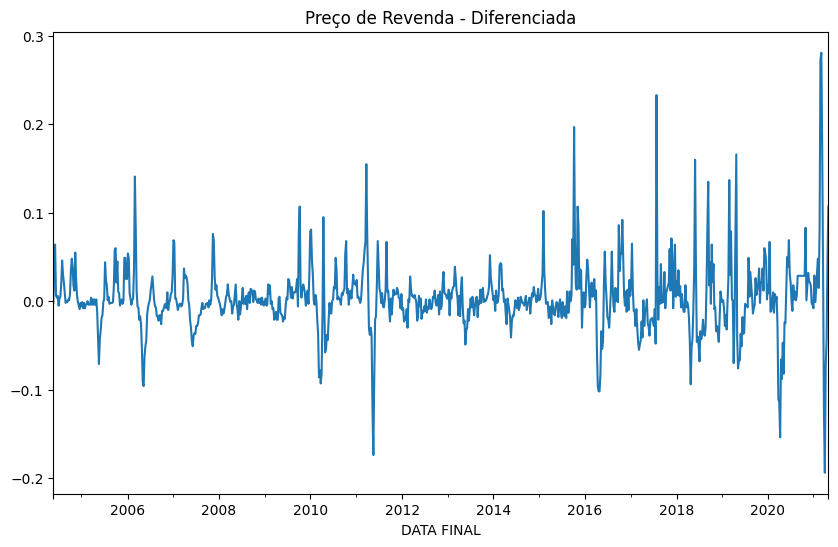

(-10.427672799177909, 1.6415265137452115e-18, 5, 879, {'1%': -3.4378113191216397, '5%': -2.8648337072350074, '10%': -2.5685238062308366}, -3632.731665203263)
Estatística ADF: -10.427672799177909
p-valor: 1.6415265137452115e-18
Critério 1% : -3.4378113191216397
Critério 5% : -2.8648337072350074
Critério 10% : -2.5685238062308366


In [ ]:
df_etanol['Preco_Revenda_diff'] = df_etanol['PREÇO MÉDIO REVENDA'] - df_etanol['PREÇO MÉDIO REVENDA'].shift(1)
df_etanol['Preco_Revenda_diff'].dropna().plot(figsize=(10, 6))
plt.title('Preço de Revenda - Diferenciada')
plt.show()

# Teste de Estacionariedade na Série Diferenciada
test_stationarity(df_etanol['Preco_Revenda_diff'].dropna())

<font color="lightgreen"> ***Análise*** </font><br>
O resultado demonstra que a série temporal é estacionária pois:


*   O valor da estatística ADF é pequeno, negativo e menor que os valores dos critérias 1%, 5% e 10%.
*   O p-valor é menor que 0.05



####Decomposição da série temporal

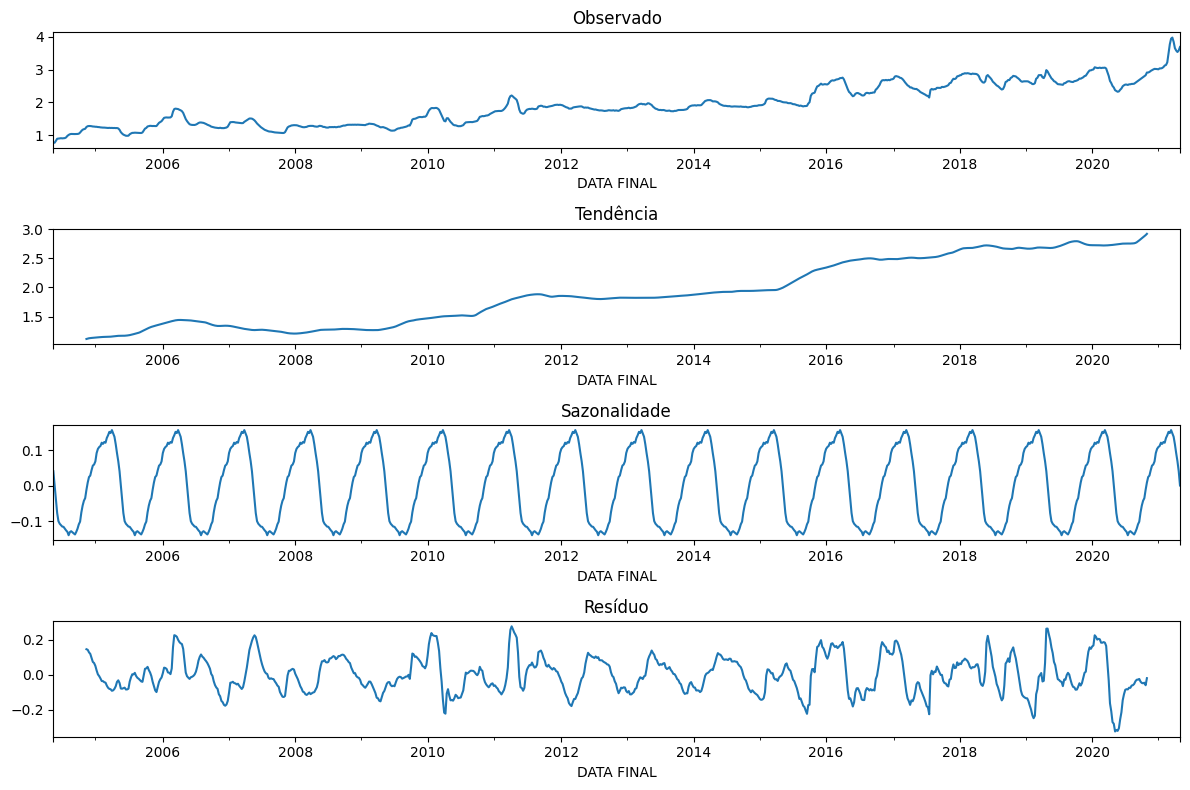

In [ ]:
decomposition = seasonal_decompose(df_etanol['PREÇO MÉDIO REVENDA'], model='additive')

# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()

####Previsão

Para a previsão, foi utilizado o modelo ARIMA (AutoRegressive Integrated Moving Average)

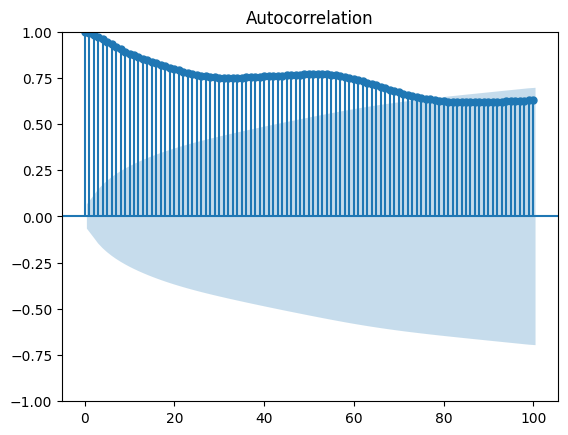

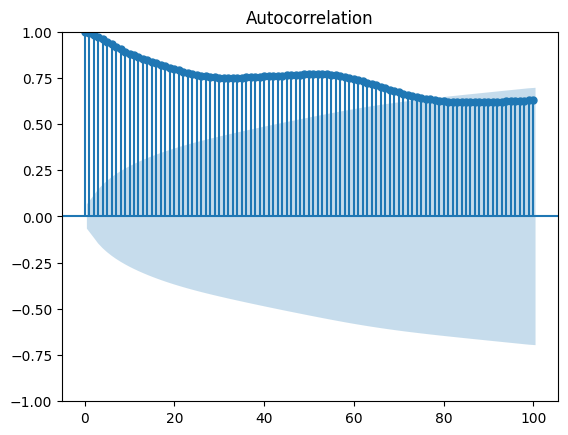

In [ ]:
# Verificação do período de sazonalidade
plot_acf(df_etanol['PREÇO MÉDIO REVENDA'], lags=100)

<font color="lightgreen"> ***Análise*** </font><br>
O resultado demonstra que uma sazonalidade anual. Os dados são semanais, o padrão ondulatório próximo ao lag 52 sugere que há uma sazonalidade anual. Nesse caso, o valor correto de m para o modelo ARIMA seria 52.

#### Previsão com o modelo auto_arima

O primeiro modelo que foi utilizado para a previsão, foi o modelo auto_arima. Os dados foram divididos em treino e teste. Sendo os dados do teste aqueles referentes ao último ciclo (~2021). Com o seguinte código:



```
model = auto_arima(
    treino['PREÇO MÉDIO REVENDA'],  # Série original
    seasonal=True,                     # Considera sazonalidade
    m=52,                              # Sazonalidade semanal (anual)
    suppress_warnings=True,            # Remove warnings desnecessários
    stepwise=True                      # Algoritmo otimizado para busca
)
```

O modelo não conseguiu modelar a variação do preço de revenda conforme mostrado na imagem abaixo.

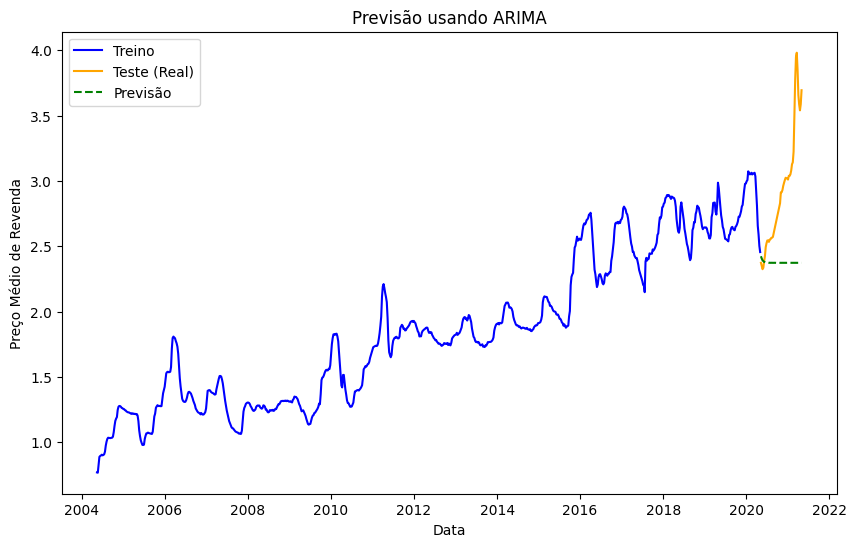

Com o objetivo de melhorar as previsões, uma nova previsão foi realizada modificando os parâmetros p, d e q do modelo, mas desta vez utilizando o modelo ARIMA:

```
# Usando o modelo ARIMA com ajuste manual dos parâmetros p, d e q
arima_model = ARIMA(
    treino['PREÇO MÉDIO REVENDA'],
    order=(2, 1, 1)  # Especifica ARIMA(p=2, d=1, q=1)
)
arima_result = arima_model.fit()
```

A previsão também não conseguiu capturar corretamente a variação dos preços de revenda.

Foi realizado uma nova previsão utilizando o modelo SARIMA:


```
# Ajustar o modelo SARIMA(2, 1, 1)(2, 0, 0, 52)
sarima_model = SARIMAX(
    treino['PREÇO MÉDIO REVENDA'],
    order=(2, 1, 1),        # Parte não sazonal ARIMA(p=2, d=1, q=1)
    seasonal_order=(2, 0, 0, 52),  # Parte sazonal SARIMA(P=2, D=0, Q=0, m=52)
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()
```

Contudo, também não obteve êxito na modelagem conforme pode ser visto na figura abaixo.

Embora estes modelos tenham capacidade de lidar com séries não estacionários, neste dataset estes modelos não conseguiram capturar o comportamento dos dados.

Diante dos resultados ruins das previsões, outro modelo foi testado: Prophet.

O modelo Prophet é rápido e eficaz para dados com sazonalidade clara e tendências. Apresenta as seguintes características de uso:


*   Aplicado à série que apresenta forte sazonalidade e comportamento não estacionário.
*   Excelente para séries temporais anuais com padrões cíclicos.





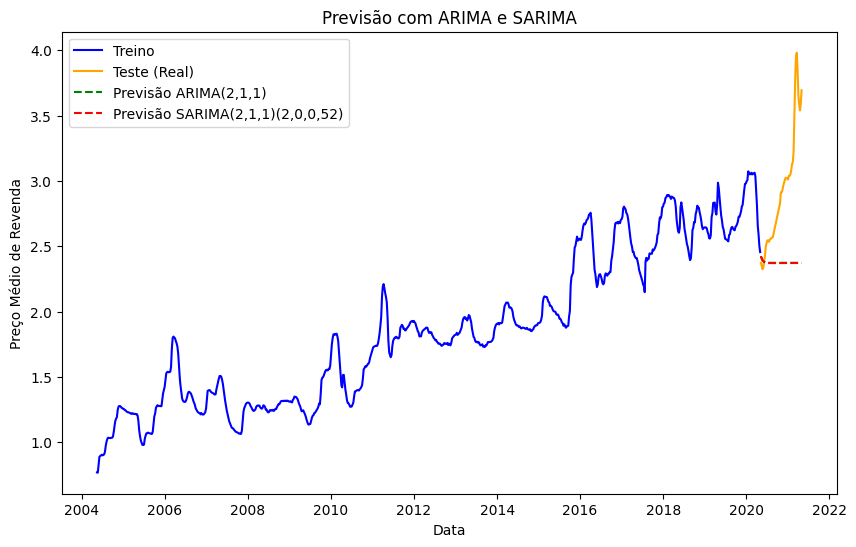

####Previsão para 5 anos usando o modelo Prophet

In [ ]:
# Reajustando o dataset para a modelagem (remover o DatetimeIndex)
df_etanol = df_combustivel_sp[df_combustivel_sp['PRODUTO'] == 'etanol hidratado'].copy()

In [ ]:
# Preparando os dados para o Prophet
df_prophet = df_etanol.reset_index()[['DATA FINAL', 'PREÇO MÉDIO REVENDA']]
df_prophet.columns = ['ds', 'y']  # Prophet exige colunas 'ds' para data e 'y' para valores

In [ ]:
# Criando e ajustando o modelo Prophet
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False)
prophet_model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoirtbdis/rnduhogh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoirtbdis/4g4ky1c2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43416', 'data', 'file=/tmp/tmpoirtbdis/rnduhogh.json', 'init=/tmp/tmpoirtbdis/4g4ky1c2.json', 'output', 'file=/tmp/tmpoirtbdis/prophet_modellb0hhnmy/prophet_model-20241216204750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:47:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Fazendo previsões (5 anos - 260 semanas)
future = prophet_model.make_future_dataframe(periods=260, freq='W-SAT')
forecast = prophet_model.predict(future)

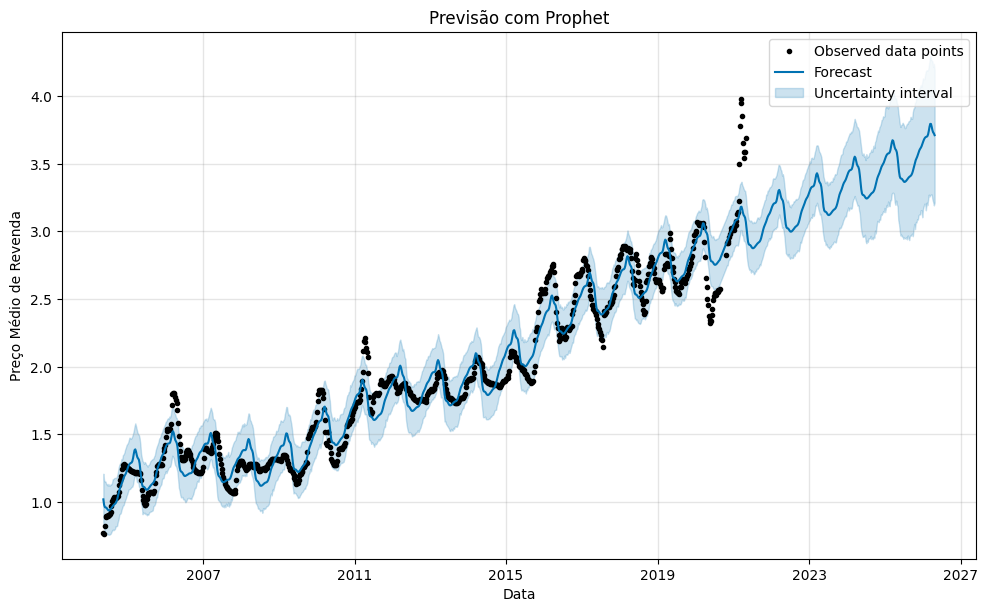

In [ ]:
# Visualizando as previsões
prophet_model.plot(forecast)
plt.title('Previsão com Prophet')
plt.xlabel('Data')
plt.ylabel('Preço Médio de Revenda')
plt.title('Previsão com Prophet')
plt.legend()
plt.show()

####Extendendo a análise
Os dados usados para treinar o modelo terminam em 25/04/2021. Como existem dados mais recentes, estes dados foram introduzidos no gráfico apenas para verificação das previsões do modelo. Seguimos as seguintes etapas:

*   Coleta de dados, usamos a seguinte referência:
[ANP](https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp)
*   Limpeza, transformação e filtragem dos dados (seleção do estado de SP, média dos valores de revenda do estado agrupados por dia)
*   Concatenação dos dataFrames (segundo semestre de 2021 a dezembro 2024)
*   Exportação do conjunto de dados criado: [etanol_2021-2024.csv](https://drive.google.com/file/d/15GBKKQijOL3sJ8Xins_E8Kil9wZrqQc5/view?usp=sharing)

In [ ]:
# Importando dados adicionais para a comparação
df_etanol2021_2024 = pd.read_csv('etanol_2021-2024.csv')

In [ ]:
#Transformar os tipos de dados
df_etanol2021_2024['DATA FINAL'] = pd.to_datetime(df_etanol2021_2024['DATA FINAL'])

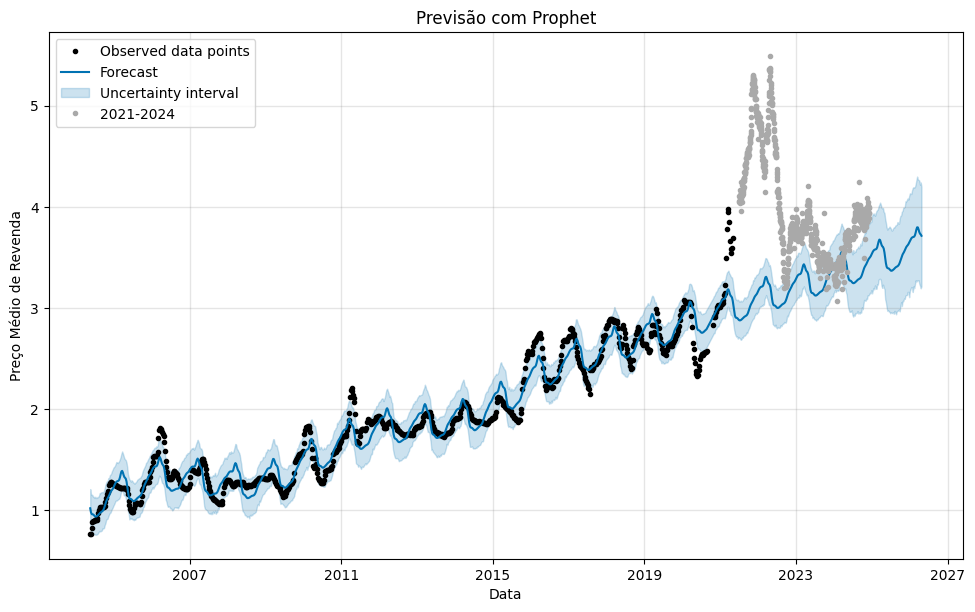

In [ ]:
# Visualizando as previsões
prophet_model.plot(forecast)
plt.plot(df_etanol2021_2024['DATA FINAL'],df_etanol2021_2024['PREÇO MÉDIO REVENDA'], label='2021-2024', color='darkgrey', marker='o', linestyle='none', markersize=3)
plt.title('Previsão com Prophet')
plt.xlabel('Data')
plt.ylabel('Preço Médio de Revenda')
plt.title('Previsão com Prophet')
plt.legend()
plt.show()

<font color="lightgreen"> ***Análise*** </font><br>
Como pode ser observado no gráfico, exceto para o período entre 2021 e 2022, o modelo conseguiu ter uma boa previsibilade dos preços. Vale ressaltar que os dados adicionados não se baseiam em médias semanais (como o modelo foi treinado), mas sim em médias diárias.

Como é sabido, a média é influenciada por dados extremos, como foi observado no dataset, o que pode explicar o pico acentuado deste período. Além de outros fatores que também podem ter contribuido para a alteração do preço. Contudo, por motivos de tempo limitado, apenas a visualização será feita.

## 6. Analise as métricas de performance do modelo: RMSE, MAPE.

Ao criar modelos preditivos, avaliar a qualidade das previsões é essencial para entender o desempenho do modelo em diferentes cenários. No dataframe de combústivel iremos utilizar as métricas MAPE, RMSE, MAE e MPE que são amplamente utilizadas para medir os erros entre os valores previstos e os valores reais. Cada uma dessas métricas fornece insights específicos, e juntas ajudam a criar uma análise mais completa do desempenho do modelo.

Separando os conjuntos de valores reais e os previstos.

In [ ]:
# Garantindo que ambas as colunas 'ds' estão no formato datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Nerge para adicionar a previsão ao dataframe original
df_prophet = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='left')

print(df_prophet.head())

          ds      y      yhat
0 2004-05-15  0.768  1.018862
1 2004-05-22  0.766  0.979552
2 2004-05-29  0.823  0.962182
3 2004-06-05  0.887  0.959115
4 2004-06-12  0.894  0.957803




---


<font color="orange"> ***RMSE*** </font><br> (Root Mean Squared Error): Mede o erro quadrático médio da previsão, pois penaliza mais os desvios maiores devido à elevação ao quadrado. sendo mais sensível a grandes erros e outliers. O RMSE é ideal para avaliar como está na mesma unidade da variável de interesse, é fácil relacionar diretamente os erros às previsões.

In [ ]:
from sklearn.metrics import mean_squared_error ##calculo do RMSE

rmse = mean_squared_error(df_prophet['y'], df_prophet['yhat'], squared=False)

print(f"RMSE: {np.sqrt(rmse)}")

RMSE: 0.37991802756983317


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<font color="lightgreen"> ***Análise*** </font><br>
Um RMSE de 0.3799 indica que, em média, as previsões apresentam erros de quase 0.38 unidades no mesmo intervalo de escala do preço. Para testar, podemos utilizar o valor do RMSE com a amplitude dos valores reais da variável [PREÇO MÉDIO REVENDA].

Se os preços variam, por exemplo, entre 2 e 6, um erro médio de 0.38 pode ser não significativo, pois representa menos de 20% da amplitude total dos dados.

In [ ]:
#calculo da amplitude dos valores reais
amplitude = df_etanol['PREÇO MÉDIO REVENDA'].max() - df_etanol['PREÇO MÉDIO REVENDA'].min()
print(f"Amplitude dos valores reais: {amplitude:.2f} do produto etanol")

Amplitude dos valores reais: 3.22 do produto etanol


O RMSE de 0.3799 representa aproximadamente *11.8%* da amplitude total dos valores reais (0.3799 ÷ 3.22 × 100). Isso indica que os erros médios de previsão são relativamente pequenos em relação à variação geral dos preços, sugerindo que <font color="lightgreen"> **o modelo está capturando bem as tendências gerais.** </font><br> A amplitude de 3.22 sugere que os preços variam de forma moderada. Comparar essa amplitude com o erro médio permite contextualizar o impacto dos erros de previsão.

> Quando utilizamos o ARIMA:

Obtivemos um erro médio quadrático de 0.775 que representava uma parcela significativa da amplitude total dos dados, que é 1.186. *aproximadamente 65.36%* dos valores reais. Então o
<font color="pink"> **modelo estava com dificuldades em capturar adequadamente a variação dos dados reais.** </font><br> Em séries temporais ou problemas de preços, um erro que corresponde a mais de 50% da amplitude dos dados pode ser significativo. Isso indica que o modelo estava gerando previsões com variações consideráveis, o que estava limitando sua utilidade prática.



---


<font color="orange"> ***MAPE*** </font><br> (Mean Absolute Percentage Error): Mostra o erro médio absoluto em termos percentuais. É expresso como uma porcentagem, tornando-o fácil de interpretar em termos relativos.

In [ ]:
mape = (abs((df_prophet['y'] - df_prophet['yhat']) / df_prophet['y']).mean()) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 5.99%


<font color="lightgreen"> ***Análise*** </font><br>
Um MAPE de 5.99% indica que, em média, as previsões diferem dos valores reais em aproximadamente 6%.
<br><font color="lightgreen"> **Isso representa um bom desempenho.**</font> Especialmente em cenários onde erros inferiores a 10% são aceitáveis.

> Quando utilizamos o ARIMA:

O MAPE indica que, em média, os valores previstos pelo modelo estavam se diferindo dos valores reais em 27,90%. Isso sugere que o modelo apresentava um <font color="pink"> **erro percentual relativamente alto para previsões**</font><br>, o que pode ser preocupante dependendo do domínio de aplicação. Para previsões financeiras, por exemplo, um MAPE acima de 20% é geralmente considerado pouco confiável, enquanto para domínios mais voláteis (como preços de commodities), é mais aceitável.


---




<font color="orange"> ***MAE*** </font><br> (Mean Absolute Error): Mede o erro absoluto médio entre os valores reais e previstos. É uma métrica mais robusta do que o RMSE em relação a outliers, pois não eleva os erros ao quadrado. É útil para medir erros médios em termos absolutos, sendo uma métrica mais simples e intuitiva. Por ser menos influenciado por grandes discrepâncias, é uma boa escolha em cenários onde outliers são esperados.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae = mean_absolute_error(df_prophet['y'], df_prophet['yhat']) ##calculo do MAE
print(f"MAE: {mae}")

MAE: 0.10979775504071045


<font color="lightgreen"> ***Análise*** </font><br>

O MAE de 0.1098 indica que, em média, os valores previstos estão desviados em 0.1098 unidades do valor real. Isso reflete um bom ajuste, dado que a amplitude é 3.22. <font color="lightgreen"> **Portanto, o modelo não está cometendo muitos erros distantes em relação à média.** </font><br>

> Quando utilizamos o ARIMA:

O nosso MAE indicava que, em média, o modelo apresentava erros absolutos de 0.7399 unidades.

Se compararmos o MAE com o RMSE anteriormente calculados, percebemos que estão próximos (0.7399 e 0.7749, respectivamente). Isso sugere que não há muitos outliers severos nos dados, ou que <font color="pink">**o modelo estava cometendo erros distantes em relação à média**.</font><br>

---




<font color="orange"> ***MPE*** </font><br> (Mean Percentage Error): Indica a tendência média da previsão (positiva para superestimação e negativa para subestimação). Um MPE positivo indica que o modelo superestima os valores reais, enquanto um MPE negativo indica subestimação. É especialmente útil para avaliar o viés do modelo (tendência de errar consistentemente para cima ou para baixo).

In [ ]:
mpe = ((df_prophet['y'] - df_prophet['yhat']) / df_prophet['y']).mean() * 100 ##calculo do MPE
print(f"MPE: {mpe:.2f}%")

MPE: -0.57%


<font color="lightgreen"> ***Análise*** </font><br>
O valor negativo (-0.57%) sugere que, em média, o modelo subestima ligeiramente os valores reais em menos de 1%. <font color="lightgreen"> **Isso indica que o viés do modelo é quase insignificante.**</font><br>

> Quando utilizamos o ARIMA:

O MPE é uma métrica que mede a tendência de superestimação ou subestimação do modelo. Um valor positivo de 27,90%, no qual obtemos anteriormente, indicava que <font color="pink">**o modelo estava consistentemente superestimando os preços reais,**</font> ou seja, as previsões tendiam a ser maiores que os valores observados.

---



<font color="lightblue"> ***Passo Extra: Visualizar  a média dos dados de previsão em uma coluna diferente*** </font><br>

Adicionando as previsões como uma nova coluna no dataframe de teste, para podermos analisar matemáticamente como as previsões estão se comportando.

In [ ]:
df_prophet['PREV_ERRO'] = df_prophet['y'] - df_prophet['yhat'] #subtração entre os valores reais e os previstos
df_prophet['PREV_ERRO'].mean()

1.1777125710308282e-05

Retornou o mesmo valor de cálculo do MAE, por partir do mesmo príncipio.


---

